In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("FinalCleanedData.csv")

In [4]:
print(df.shape)

df.describe()

(219088, 46)


RFHYPE5        RFCHOL2          MICHD       CVDSTRK3  \
count  219088.000000  219088.000000  219088.000000  219088.000000   
mean        0.422342       0.386877       0.089494       0.041458   
std         0.493934       0.487036       0.285456       0.199348   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       1.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

             CASTHM1       CHCSCNCR       CHCOCNCR       CHCCOPD2  \
count  219088.000000  219088.000000  219088.000000  219088.000000   
mean        0.093410       0.107569       0.105076       0.080187   
std         0.291007       0.309836       0.306653       0.271583   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

            CHCKDNY2       DIABETE4  ...        STRFREQ        FRUTDA2  \
count  219088.000000  219088.000000  ...  219088.000000  219088.000000   
mean        0.039140       0.143038  ...       1.481580       1.058286   
std         0.193927       0.350113  ...       2.109176       0.893818   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.430000   
50%         0.000000       0.000000  ...       0.000000       1.000000   
75%         0.000000       0.000000  ...       3.000000       1.140000   
max         1.000000       1.000000  ...       7.000000       5.000000   

             FTJUDA2        GRENDA1        FRNCHDA        POTADA1  \
count  219088.000000  219088.000000  219088.000000  219088.000000   
mean        0.254764       0.539277       0.181107       0.207990   
std         0.434335       0.500841       0.206658       0.218421   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.140000       0.030000       0.070000   
50%         0.020000       0.430000       0.140000       0.140000   
75%         0.290000       0.710000       0.290000       0.290000   
max         3.000000       4.000000       1.000000       1.000000   

             VEGEDA2       HIVRISK5            AGE           RACE  
count  219088.000000  219088.000000  219088.000000  219088.000000  
mean        0.877880       1.961915      56.357222       1.898570  
std         0.674444       0.191402      16.151015       2.103903  
min         0.000000       1.000000      18.000000       1.000000  
25%         0.430000       2.000000      45.000000       1.000000  
50%         0.860000       2.000000      59.000000       1.000000  
75%         1.000000       2.000000      69.000000       1.000000  
max         5.000000       2.000000      80.000000       8.000000  

[8 rows x 45 columns]

In [5]:
df.dtypes
#all are int64

RFHYPE5       int64
RFCHOL2       int64
MICHD         int64
CVDSTRK3      int64
CASTHM1       int64
CHCSCNCR      int64
CHCOCNCR      int64
CHCCOPD2      int64
CHCKDNY2      int64
DIABETE4      int64
DRDXAR2       int64
SEXVAR        int64
GENHLTH       int64
PHYS14D       int64
MENT14D       int64
POORHLTH      int64
HLTHPLN1      int64
PERSDOC2      int64
MEDCOST       int64
CHECKUP1      int64
MARITAL       int64
EDUCA         int64
RENTHOM1      int64
VETERAN3      int64
EMPLOY1       int64
CHLDCNT       int64
INCOME2       int64
WTKG3         int64
HTM4          int64
PREGNANT      int64
DEAF          int64
BLIND         int64
RFSMOK3       int64
RFDRHV7       int64
TOTINDA       int64
STRFREQ     float64
FRUTDA2     float64
FTJUDA2     float64
GRENDA1     float64
FRNCHDA     float64
POTADA1     float64
VEGEDA2     float64
HIVRISK5      int64
AGE           int64
STATE        object
RACE          int64
dtype: object

In [6]:
state_dummies = pd.get_dummies(df.STATE, prefix = "State_").iloc[:,1:]
df = pd.concat([df,state_dummies], axis = 1)
df.drop("STATE", axis = 1, inplace = True)
print(len(df.dtypes)) #Alabama as baseline

96


In [7]:
df[df.isna().any(axis=1)]
# all no NA values


Empty DataFrame
Columns: [RFHYPE5, RFCHOL2, MICHD, CVDSTRK3, CASTHM1, CHCSCNCR, CHCOCNCR, CHCCOPD2, CHCKDNY2, DIABETE4, DRDXAR2, SEXVAR, GENHLTH, PHYS14D, MENT14D, POORHLTH, HLTHPLN1, PERSDOC2, MEDCOST, CHECKUP1, MARITAL, EDUCA, RENTHOM1, VETERAN3, EMPLOY1, CHLDCNT, INCOME2, WTKG3, HTM4, PREGNANT, DEAF, BLIND, RFSMOK3, RFDRHV7, TOTINDA, STRFREQ, FRUTDA2, FTJUDA2, GRENDA1, FRNCHDA, POTADA1, VEGEDA2, HIVRISK5, AGE, RACE, State__Alaska, State__Arizona, State__Arkansas, State__California, State__Colorado, State__Connecticut, State__Delaware, State__District of Columbia, State__Florida, State__Georgia, State__Guam, State__Hawaii, State__Idaho, State__Illinois, State__Indiana, State__Iowa, State__Kansas, State__Kentucky, State__Louisiana, State__Maine, State__Maryland, State__Massachusetts, State__Michigan, State__Minnesota, State__Mississippi, State__Missouri, State__Montana, State__Nebraska, State__Nevada, State__New Hampshire, State__New Mexico, State__New York, State__North Carolina, State__North Dakota, State__Ohio, State__Oklahoma, State__Oregon, State__Pennsylvania, State__Puerto Rico, State__Rhode Island, State__South Carolina, State__South Dakota, State__Tennessee, State__Texas, State__Utah, State__Vermont, State__Virginia, State__Washington, State__West Virginia, State__Wisconsin, State__Wyoming]
Index: []

[0 rows x 96 columns]

In [8]:
df[df.isnull().any(axis=1)]
# no null values

Empty DataFrame
Columns: [RFHYPE5, RFCHOL2, MICHD, CVDSTRK3, CASTHM1, CHCSCNCR, CHCOCNCR, CHCCOPD2, CHCKDNY2, DIABETE4, DRDXAR2, SEXVAR, GENHLTH, PHYS14D, MENT14D, POORHLTH, HLTHPLN1, PERSDOC2, MEDCOST, CHECKUP1, MARITAL, EDUCA, RENTHOM1, VETERAN3, EMPLOY1, CHLDCNT, INCOME2, WTKG3, HTM4, PREGNANT, DEAF, BLIND, RFSMOK3, RFDRHV7, TOTINDA, STRFREQ, FRUTDA2, FTJUDA2, GRENDA1, FRNCHDA, POTADA1, VEGEDA2, HIVRISK5, AGE, RACE, State__Alaska, State__Arizona, State__Arkansas, State__California, State__Colorado, State__Connecticut, State__Delaware, State__District of Columbia, State__Florida, State__Georgia, State__Guam, State__Hawaii, State__Idaho, State__Illinois, State__Indiana, State__Iowa, State__Kansas, State__Kentucky, State__Louisiana, State__Maine, State__Maryland, State__Massachusetts, State__Michigan, State__Minnesota, State__Mississippi, State__Missouri, State__Montana, State__Nebraska, State__Nevada, State__New Hampshire, State__New Mexico, State__New York, State__North Carolina, State__North Dakota, State__Ohio, State__Oklahoma, State__Oregon, State__Pennsylvania, State__Puerto Rico, State__Rhode Island, State__South Carolina, State__South Dakota, State__Tennessee, State__Texas, State__Utah, State__Vermont, State__Virginia, State__Washington, State__West Virginia, State__Wisconsin, State__Wyoming]
Index: []

[0 rows x 96 columns]

In [9]:
df.columns

Index(['RFHYPE5', 'RFCHOL2', 'MICHD', 'CVDSTRK3', 'CASTHM1', 'CHCSCNCR',
       'CHCOCNCR', 'CHCCOPD2', 'CHCKDNY2', 'DIABETE4', 'DRDXAR2', 'SEXVAR',
       'GENHLTH', 'PHYS14D', 'MENT14D', 'POORHLTH', 'HLTHPLN1', 'PERSDOC2',
       'MEDCOST', 'CHECKUP1', 'MARITAL', 'EDUCA', 'RENTHOM1', 'VETERAN3',
       'EMPLOY1', 'CHLDCNT', 'INCOME2', 'WTKG3', 'HTM4', 'PREGNANT', 'DEAF',
       'BLIND', 'RFSMOK3', 'RFDRHV7', 'TOTINDA', 'STRFREQ', 'FRUTDA2',
       'FTJUDA2', 'GRENDA1', 'FRNCHDA', 'POTADA1', 'VEGEDA2', 'HIVRISK5',
       'AGE', 'RACE', 'State__Alaska', 'State__Arizona', 'State__Arkansas',
       'State__California', 'State__Colorado', 'State__Connecticut',
       'State__Delaware', 'State__District of Columbia', 'State__Florida',
       'State__Georgia', 'State__Guam', 'State__Hawaii', 'State__Idaho',
       'State__Illinois', 'State__Indiana', 'State__Iowa', 'State__Kansas',
       'State__Kentucky', 'State__Louisiana', 'State__Maine',
       'State__Maryland', 'State__Massachusetts'

In [10]:
all_col = ['RFHYPE5', 'RFCHOL2', 'MICHD', 'CVDSTRK3', 'CASTHM1', 'CHCSCNCR',
       'CHCOCNCR', 'CHCCOPD2', 'CHCKDNY2', 'DIABETE4', 'DRDXAR2', 'SEXVAR',
       'GENHLTH', 'PHYS14D', 'MENT14D', 'POORHLTH', 'HLTHPLN1', 'PERSDOC2',
       'MEDCOST', 'CHECKUP1', 'MARITAL', 'EDUCA', 'RENTHOM1', 'VETERAN3',
       'EMPLOY1', 'CHLDCNT', 'INCOME2', 'WTKG3', 'HTM4', 'PREGNANT', 'DEAF',
       'BLIND', 'RFSMOK3', 'RFDRHV7', 'TOTINDA', 'STRFREQ', 'FRUTDA2',
       'FTJUDA2', 'GRENDA1', 'FRNCHDA', 'POTADA1', 'VEGEDA2', 'HIVRISK5',
       'AGE', 'RACE', 'State__Alaska', 'State__Arizona', 'State__Arkansas',
       'State__California', 'State__Colorado', 'State__Connecticut',
       'State__Delaware', 'State__District of Columbia', 'State__Florida',
       'State__Georgia', 'State__Guam', 'State__Hawaii', 'State__Idaho',
       'State__Illinois', 'State__Indiana', 'State__Iowa', 'State__Kansas',
       'State__Kentucky', 'State__Louisiana', 'State__Maine',
       'State__Maryland', 'State__Massachusetts', 'State__Michigan',
       'State__Minnesota', 'State__Mississippi', 'State__Missouri',
       'State__Montana', 'State__Nebraska', 'State__Nevada',
       'State__New Hampshire', 'State__New Mexico', 'State__New York',
       'State__North Carolina', 'State__North Dakota', 'State__Ohio',
       'State__Oklahoma', 'State__Oregon', 'State__Pennsylvania',
       'State__Puerto Rico', 'State__Rhode Island', 'State__South Carolina',
       'State__South Dakota', 'State__Tennessee', 'State__Texas',
       'State__Utah', 'State__Vermont', 'State__Virginia', 'State__Washington',
       'State__West Virginia', 'State__Wisconsin', 'State__Wyoming']
print(len(all_col))

x_col = ['SEXVAR', 'GENHLTH', 'PHYS14D', 'MENT14D', 'POORHLTH', 'HLTHPLN1',
       'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'MARITAL', 'EDUCA', 'RENTHOM1',
       'VETERAN3', 'EMPLOY1', 'CHLDCNT', 'INCOME2', 'WTKG3', 'HTM4',
       'PREGNANT', 'DEAF', 'BLIND', 'RFSMOK3', 'RFDRHV7', 'TOTINDA', 'STRFREQ',
       'FRUTDA2', 'FTJUDA2', 'GRENDA1', 'FRNCHDA', 'POTADA1', 'VEGEDA2',
       'HIVRISK5', 'AGE', 'RACE','State__Alaska', 'State__Arizona', 'State__Arkansas',
       'State__California', 'State__Colorado', 'State__Connecticut',
       'State__Delaware', 'State__District of Columbia', 'State__Florida',
       'State__Georgia', 'State__Guam', 'State__Hawaii', 'State__Idaho',
       'State__Illinois', 'State__Indiana', 'State__Iowa', 'State__Kansas',
       'State__Kentucky', 'State__Louisiana', 'State__Maine',
       'State__Maryland', 'State__Massachusetts', 'State__Michigan',
       'State__Minnesota', 'State__Mississippi', 'State__Missouri',
       'State__Montana', 'State__Nebraska', 'State__Nevada',
       'State__New Hampshire', 'State__New Mexico', 'State__New York',
       'State__North Carolina', 'State__North Dakota', 'State__Ohio',
       'State__Oklahoma', 'State__Oregon', 'State__Pennsylvania',
       'State__Puerto Rico', 'State__Rhode Island', 'State__South Carolina',
       'State__South Dakota', 'State__Tennessee', 'State__Texas',
       'State__Utah', 'State__Vermont', 'State__Virginia', 'State__Washington',
       'State__West Virginia', 'State__Wisconsin', 'State__Wyoming']
print(len(x_col))
#non-medical only

target_d = ["MICHD", "CHCCOPD2", "CHCKDNY2", "CVDSTRK3", "DIABETE4"]
# heart disease - MICHD , lung disease - CHCCOPD2, kidney disease - CHCKDNY2, 
# stroke - CVDSTRK3, diabetes - DIABETE4

96
85


# Data Pre-Processing

In [11]:
df.describe()
# we are mostly dealing with categorical data but some columns dont just range from 0-1 but 
# ranges from 0-8 or "Height" which is in cm and can range to 3 digits (100+cm).
# thus we need to scale data to [0-1] 

RFHYPE5        RFCHOL2          MICHD       CVDSTRK3  \
count  219088.000000  219088.000000  219088.000000  219088.000000   
mean        0.422342       0.386877       0.089494       0.041458   
std         0.493934       0.487036       0.285456       0.199348   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       1.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

             CASTHM1       CHCSCNCR       CHCOCNCR       CHCCOPD2  \
count  219088.000000  219088.000000  219088.000000  219088.000000   
mean        0.093410       0.107569       0.105076       0.080187   
std         0.291007       0.309836       0.306653       0.271583   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

            CHCKDNY2       DIABETE4  ...  State__South Dakota  \
count  219088.000000  219088.000000  ...        219088.000000   
mean        0.039140       0.143038  ...             0.015387   
std         0.193927       0.350113  ...             0.123085   
min         0.000000       0.000000  ...             0.000000   
25%         0.000000       0.000000  ...             0.000000   
50%         0.000000       0.000000  ...             0.000000   
75%         0.000000       0.000000  ...             0.000000   
max         1.000000       1.000000  ...             1.000000   

       State__Tennessee   State__Texas    State__Utah  State__Vermont  \
count     219088.000000  219088.000000  219088.000000   219088.000000   
mean           0.013807       0.025857       0.028619        0.014401   
std            0.116690       0.158710       0.166733        0.119136   
min            0.000000       0.000000       0.000000        0.000000   
25%            0.000000       0.000000       0.000000        0.000000   
50%            0.000000       0.000000       0.000000        0.000000   
75%            0.000000       0.000000       0.000000        0.000000   
max            1.000000       1.000000       1.000000        1.000000   

       State__Virginia  State__Washington  State__West Virginia  \
count    219088.000000      219088.000000         219088.000000   
mean          0.024515           0.031878              0.014401   
std           0.154643           0.175675              0.119136   
min           0.000000           0.000000              0.000000   
25%           0.000000           0.000000              0.000000   
50%           0.000000           0.000000              0.000000   
75%           0.000000           0.000000              0.000000   
max           1.000000           1.000000              1.000000   

       State__Wisconsin  State__Wyoming  
count     219088.000000   219088.000000  
mean           0.013689        0.012096  
std            0.116195        0.109313  
min            0.000000        0.000000  
25%            0.000000        0.000000  
50%            0.000000        0.000000  
75%            0.000000        0.000000  
max            1.000000        1.000000  

[8 rows x 96 columns]

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
print(scaled)

[[1. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

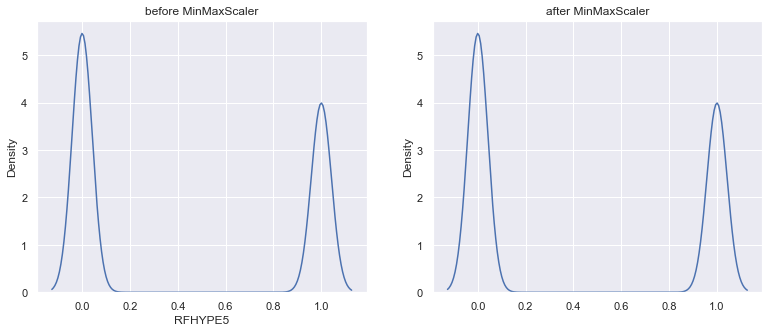

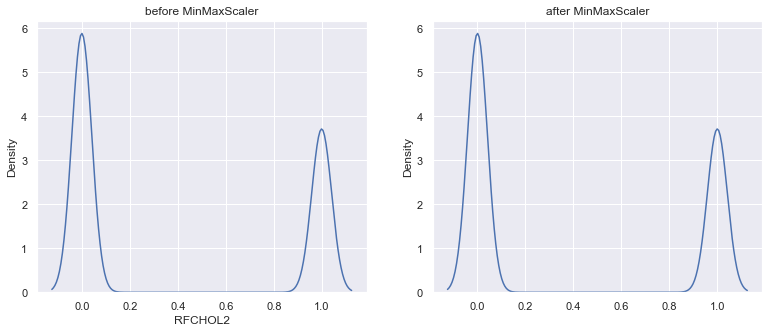

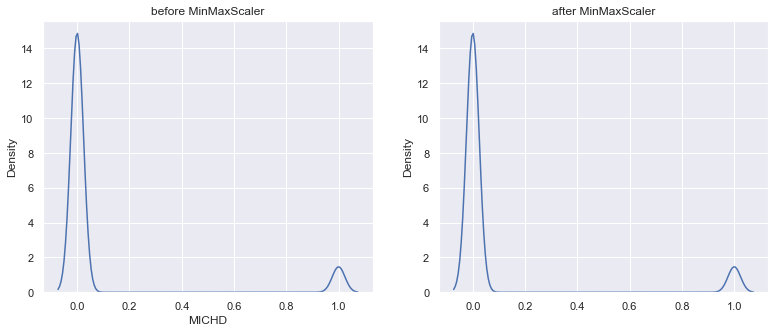

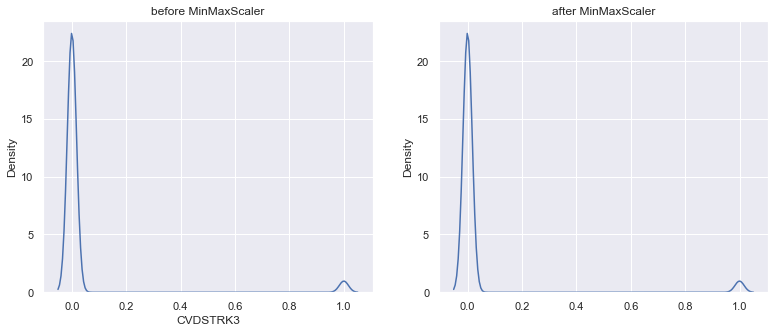

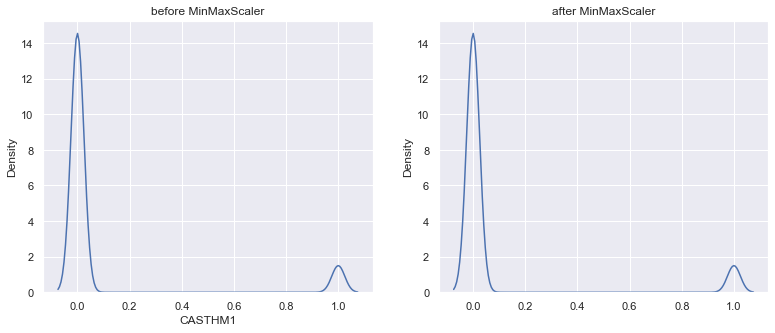

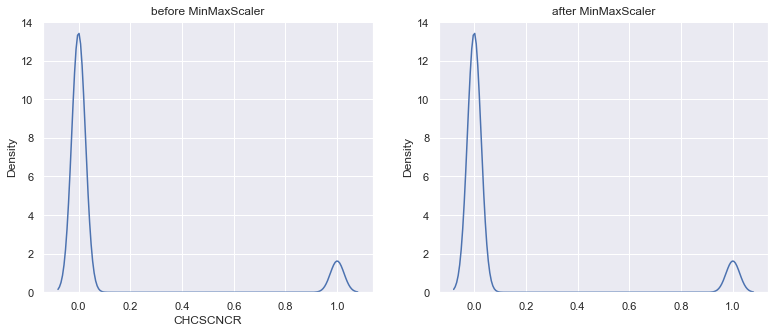

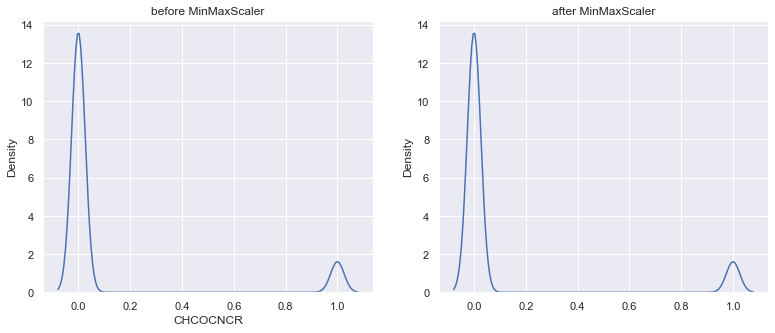

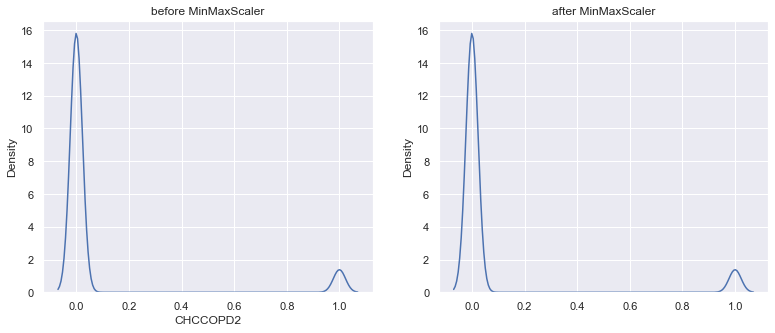

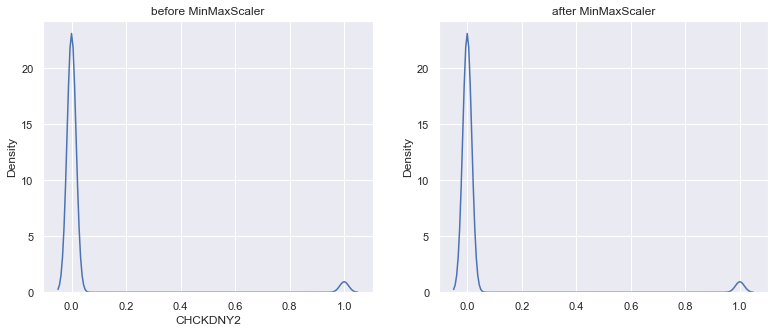

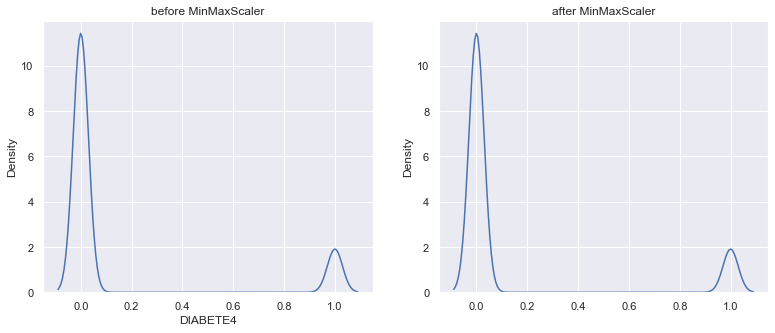

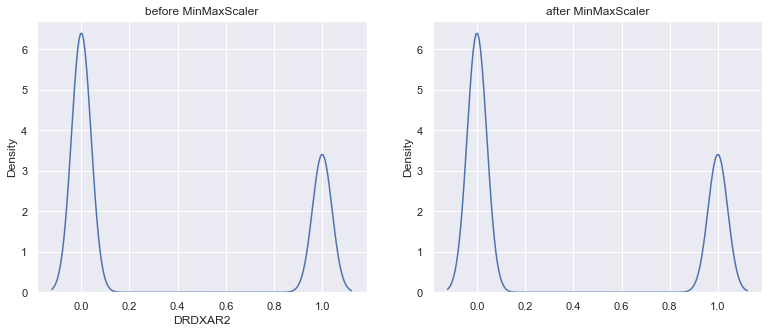

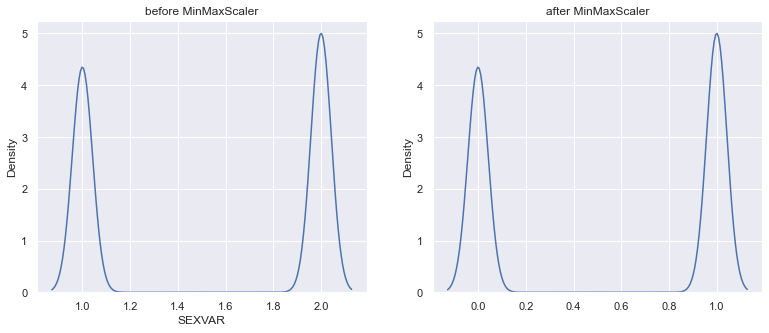

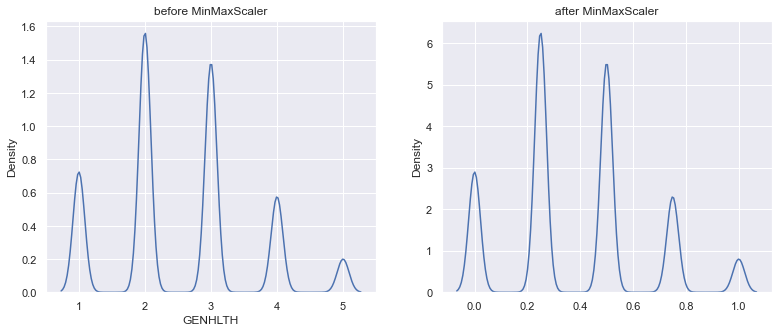

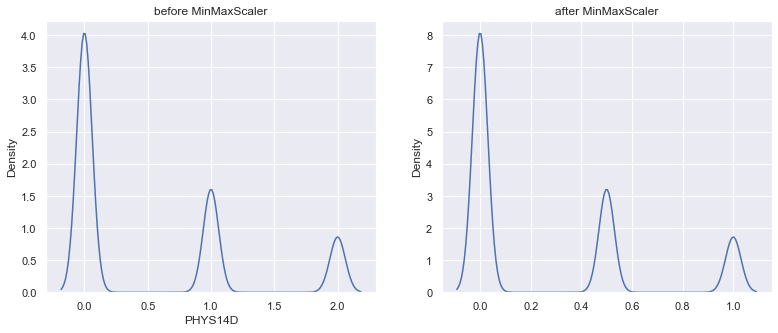

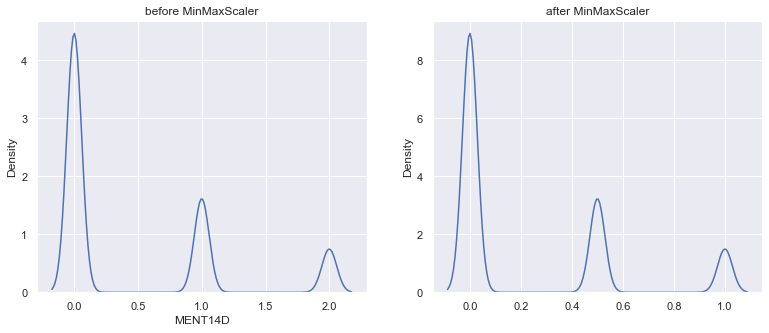

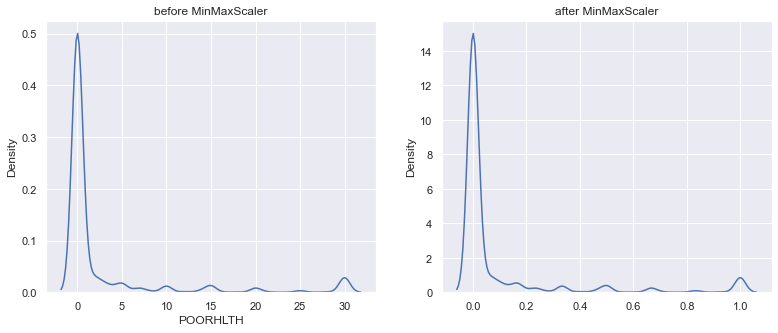

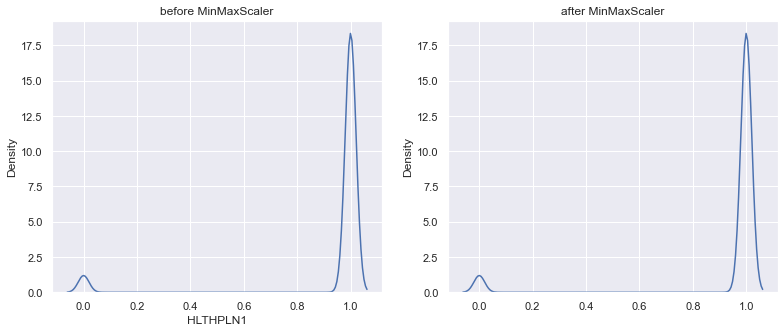

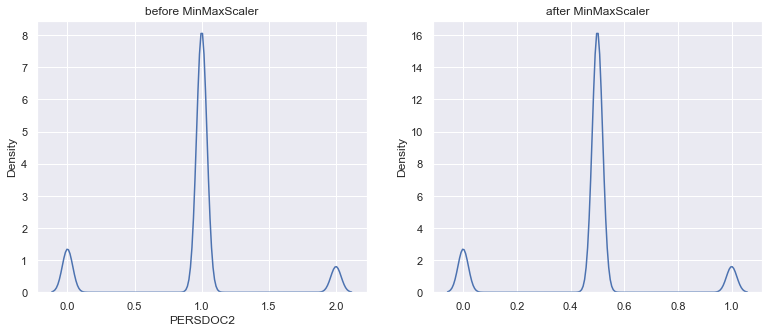

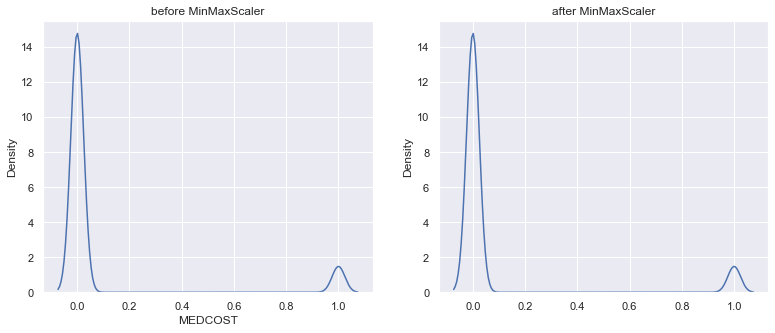

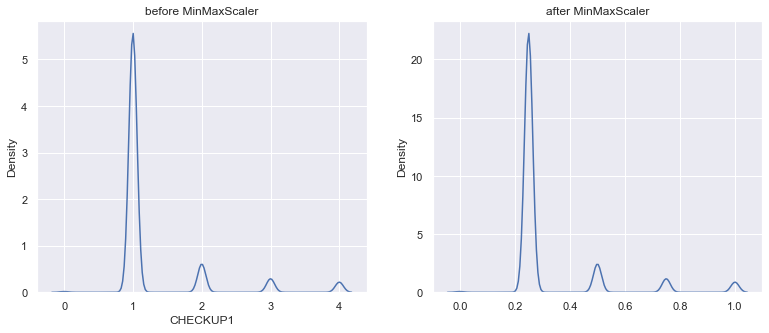

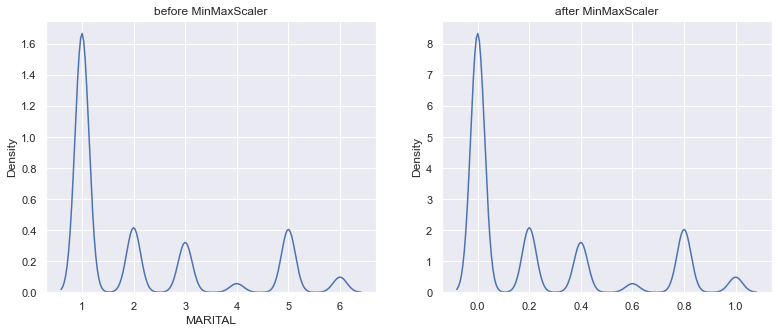

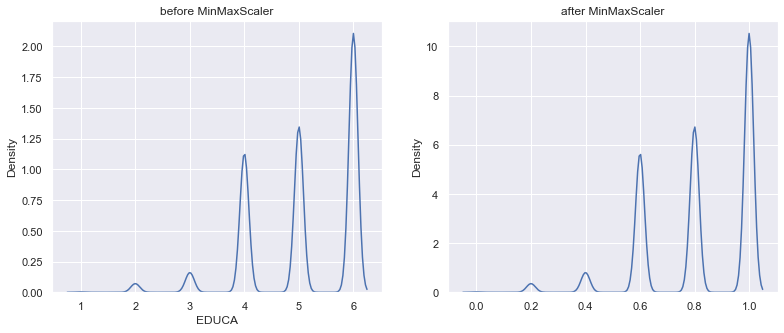

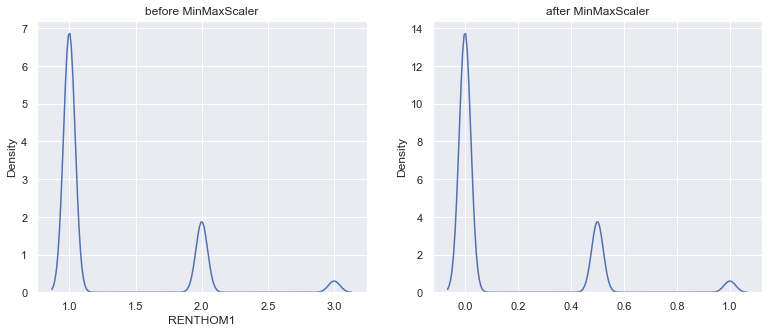

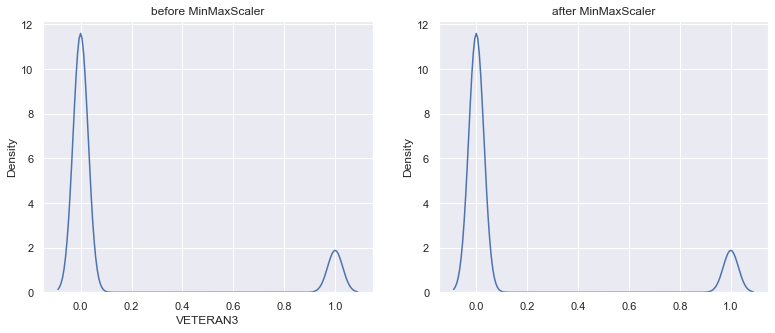

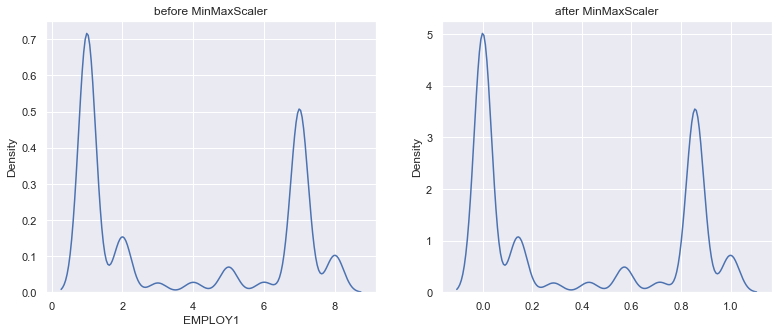

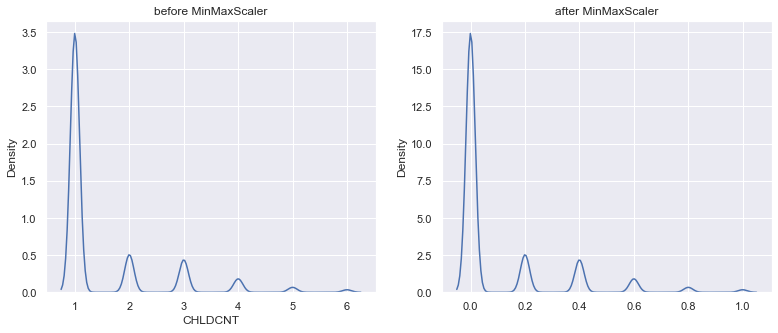

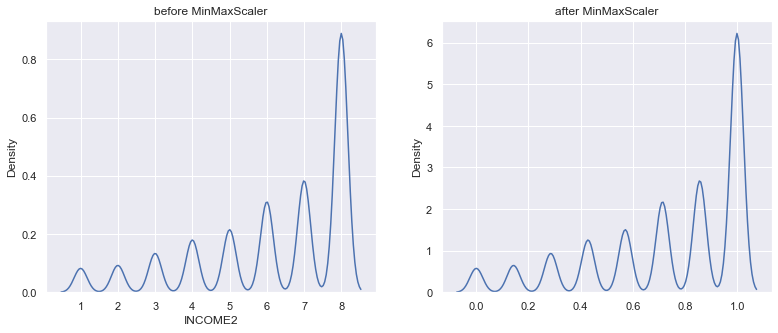

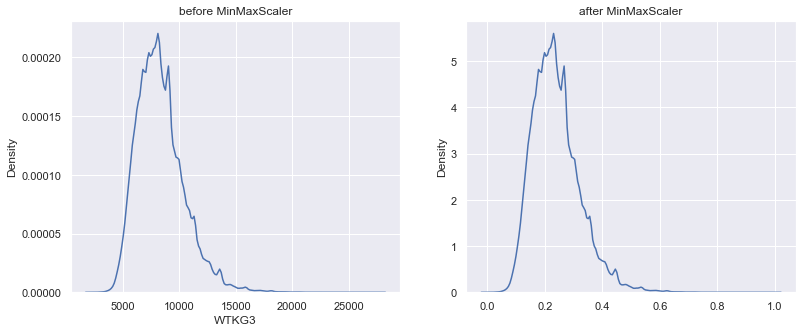

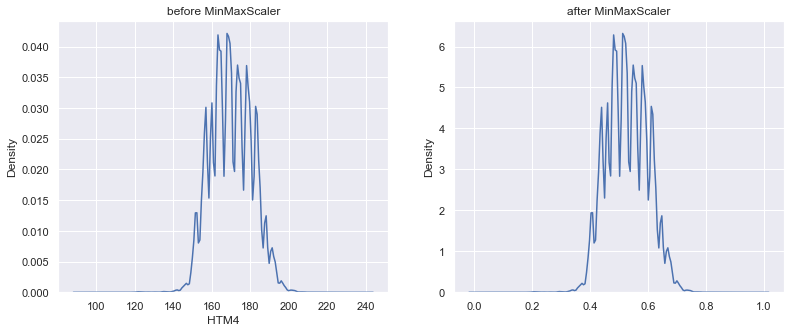

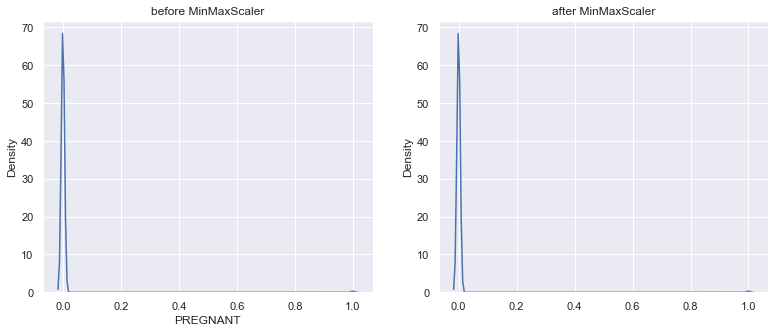

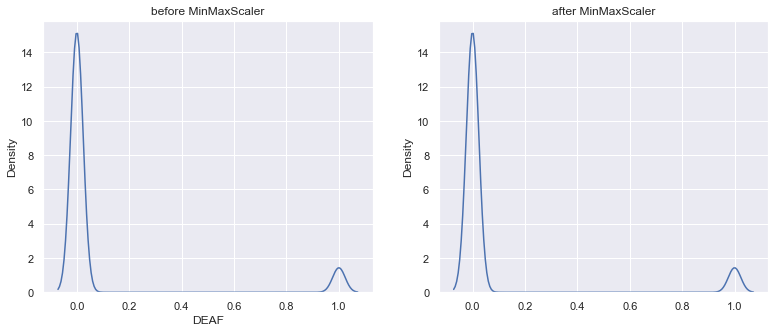

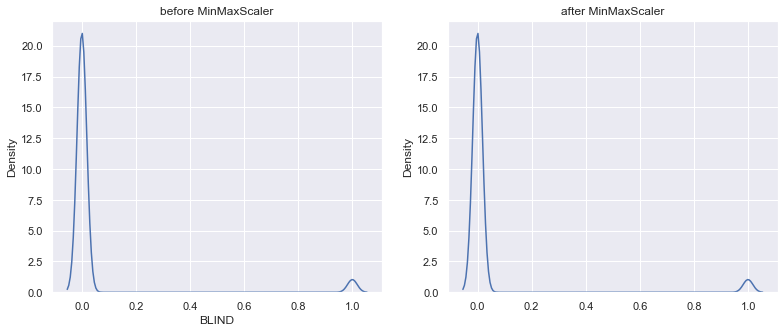

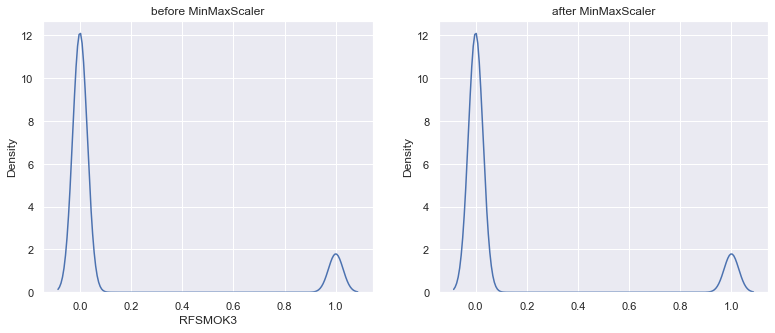

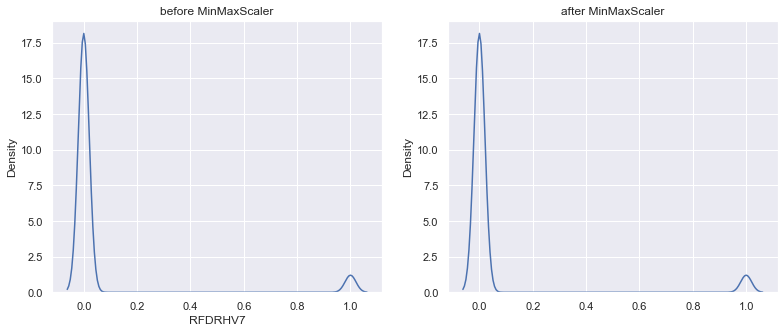

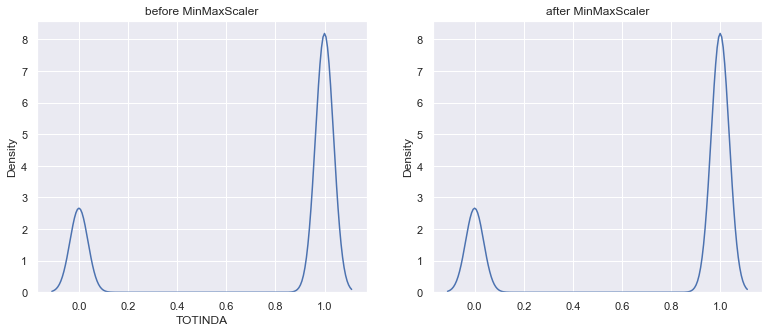

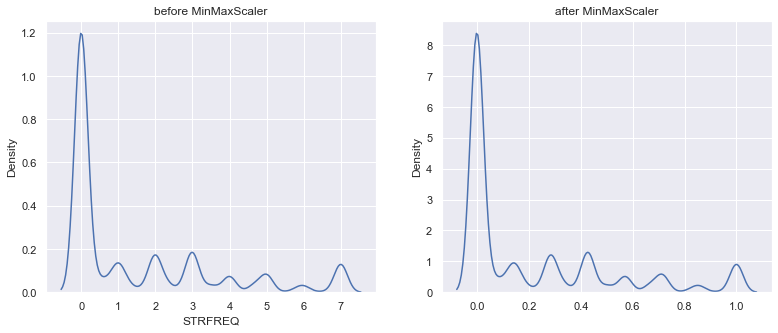

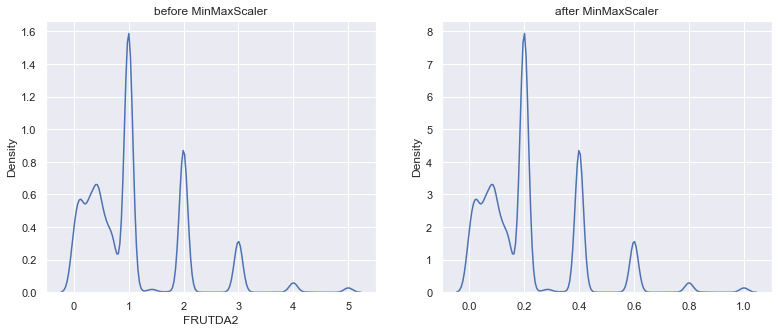

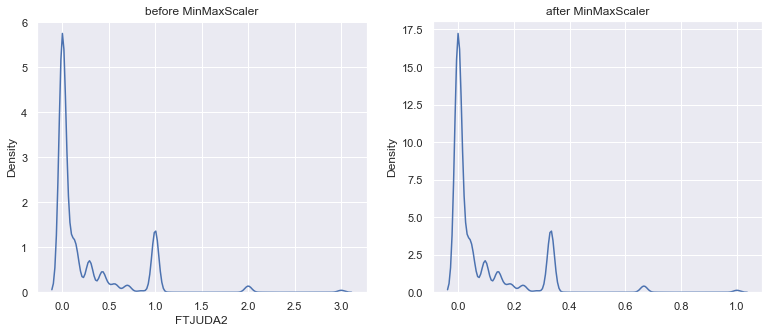

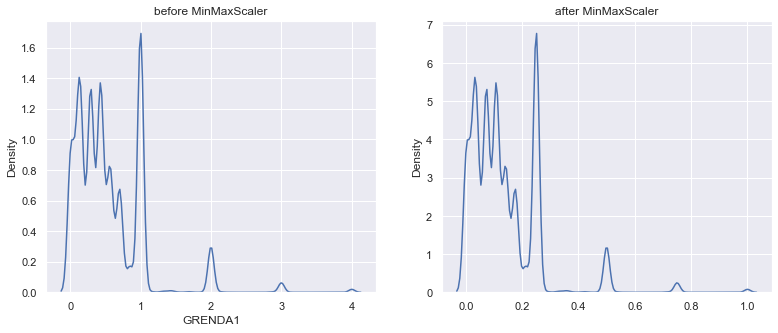

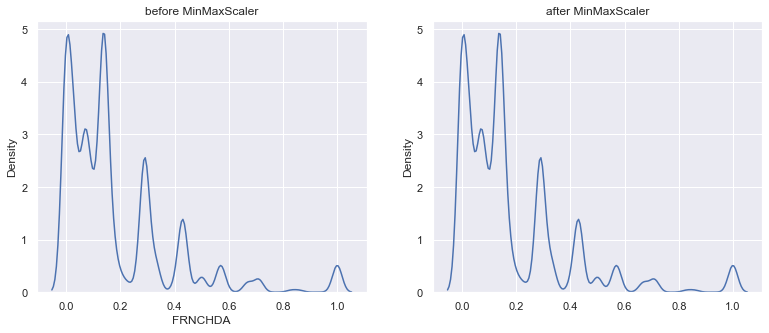

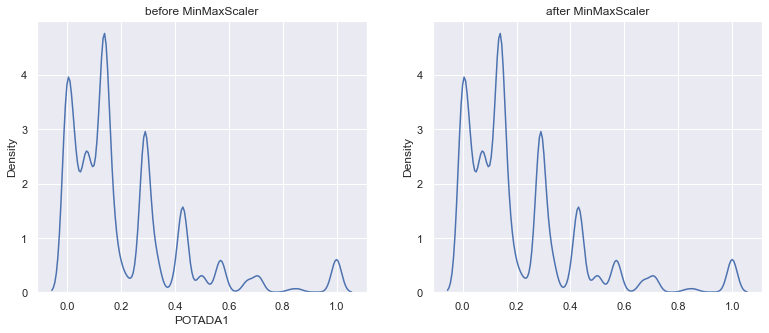

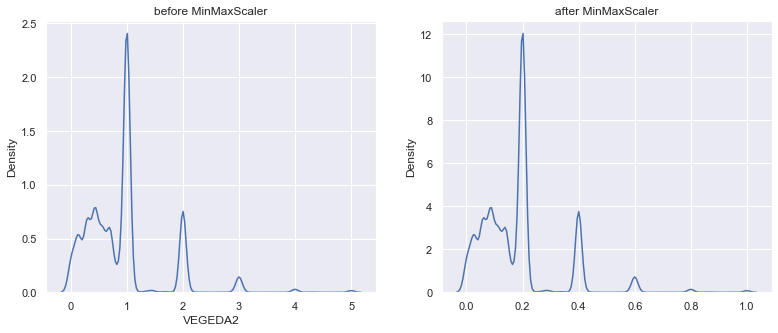

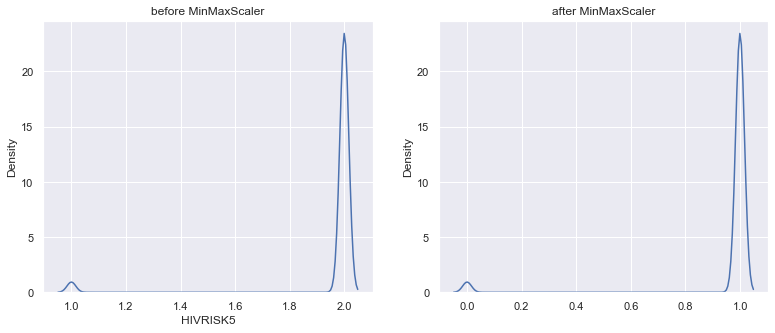

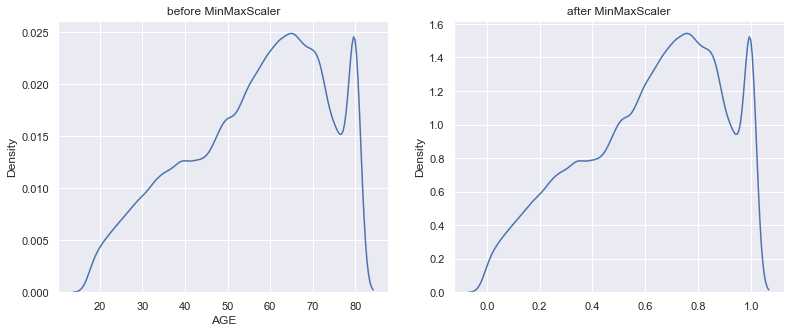

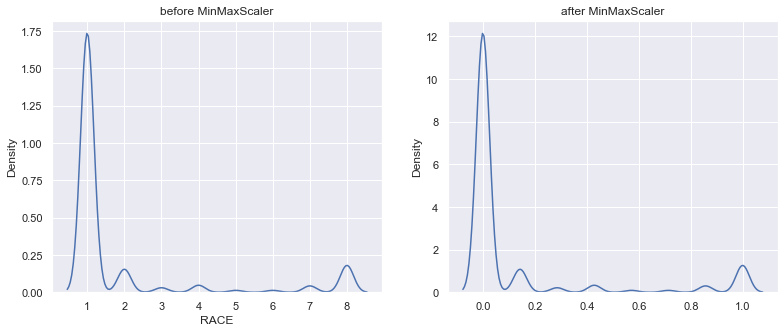

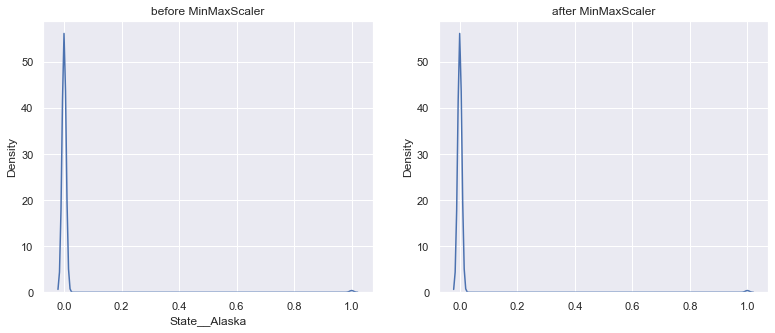

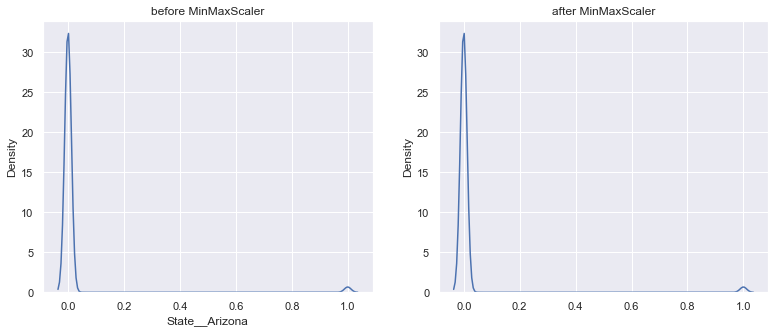

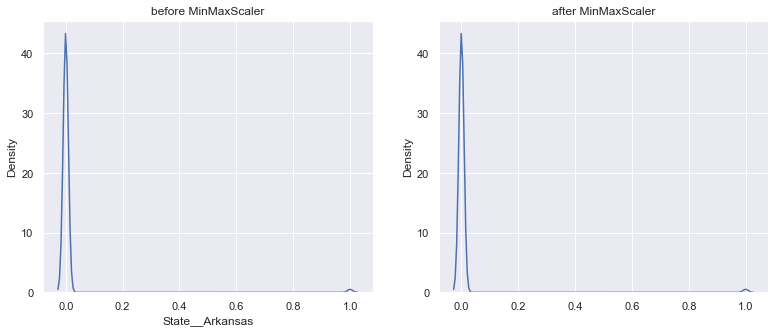

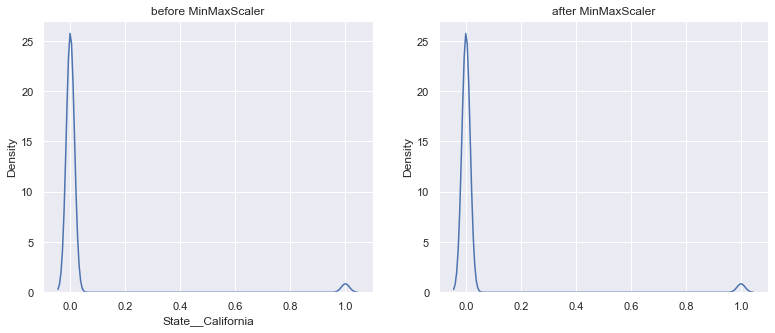

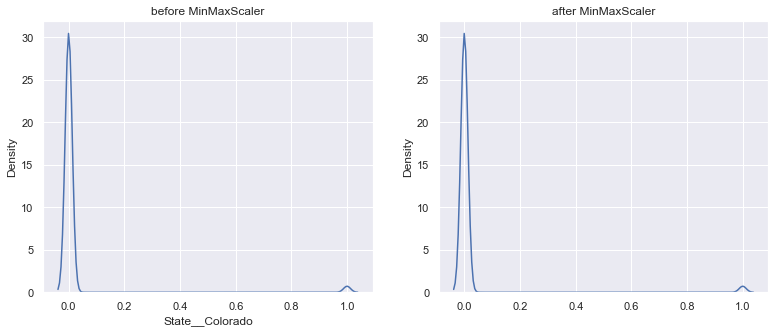

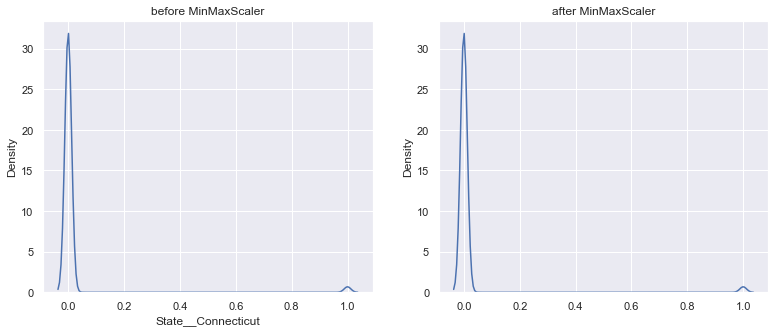

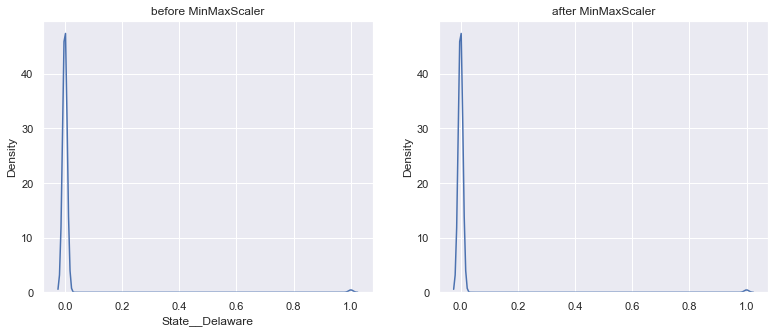

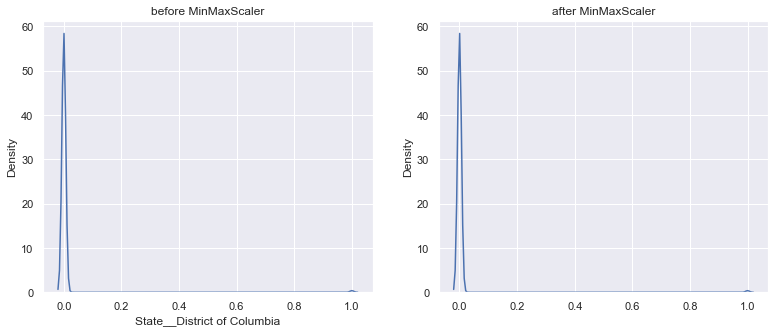

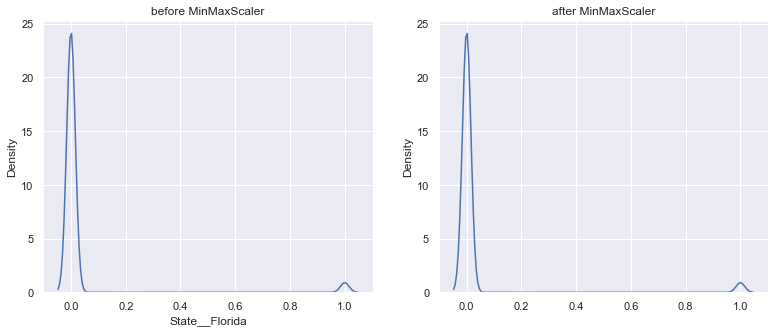

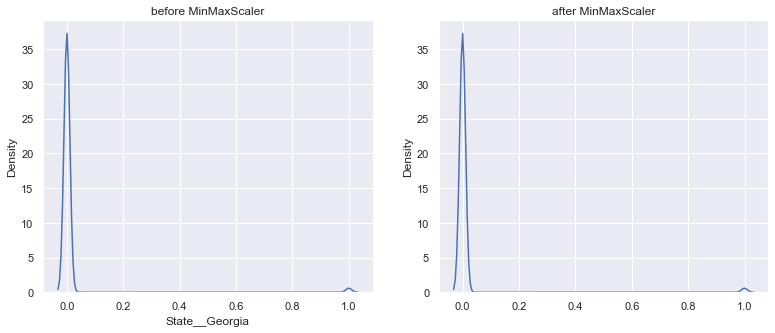

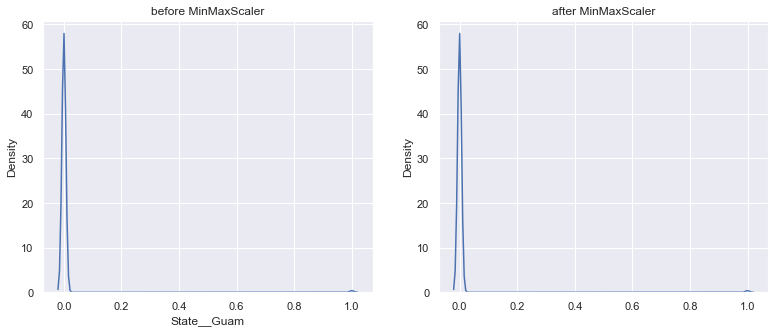

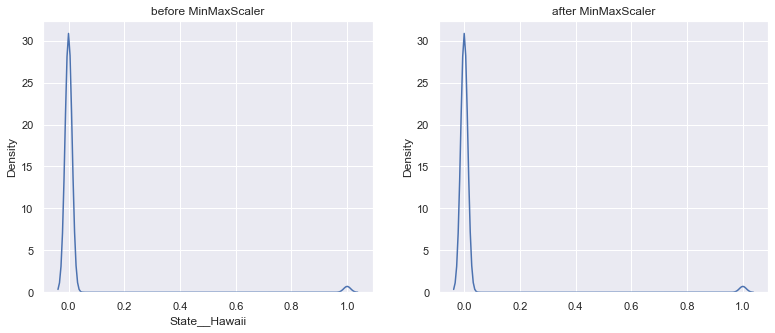

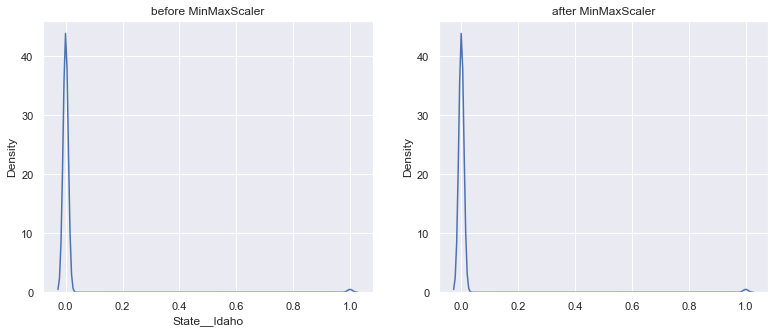

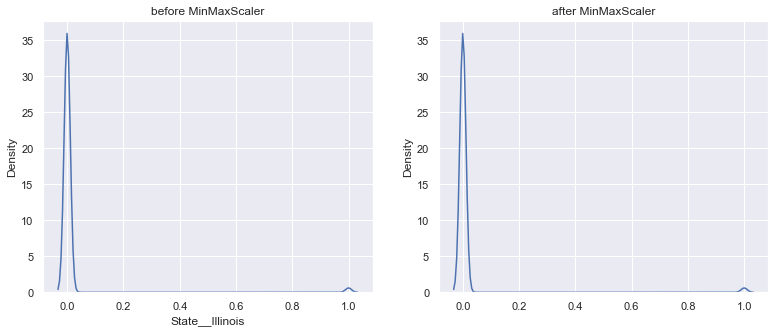

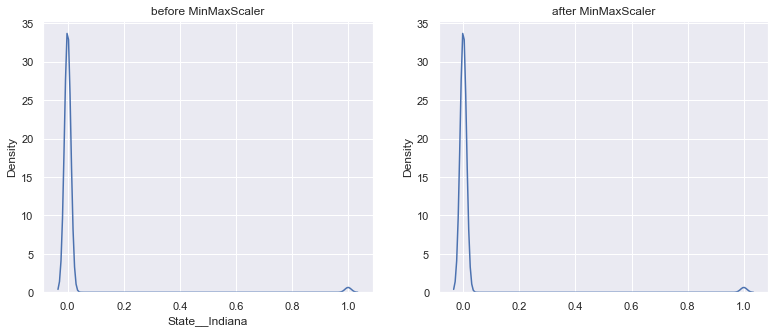

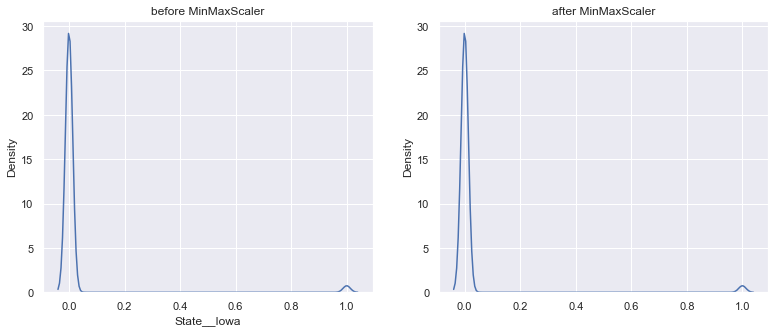

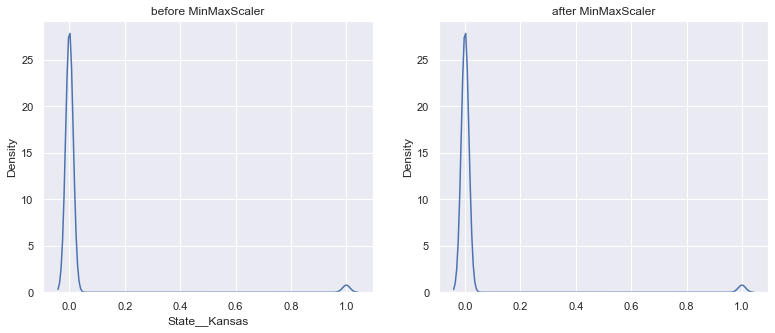

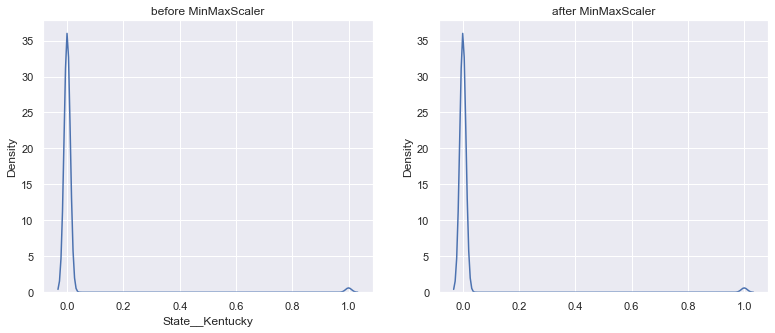

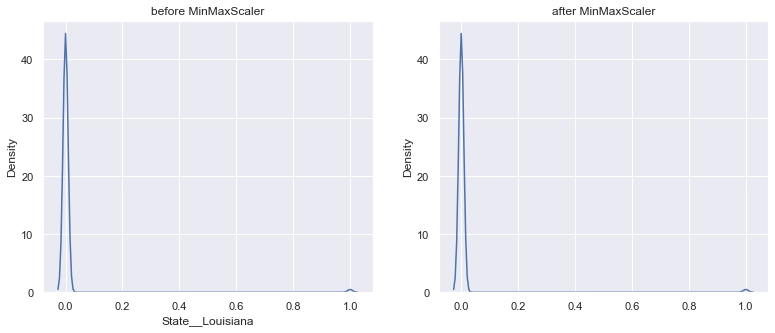

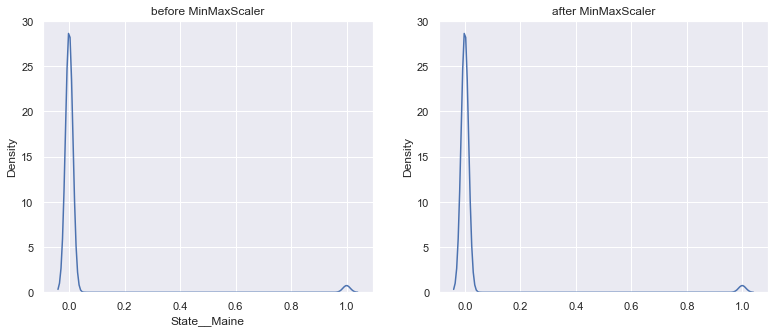

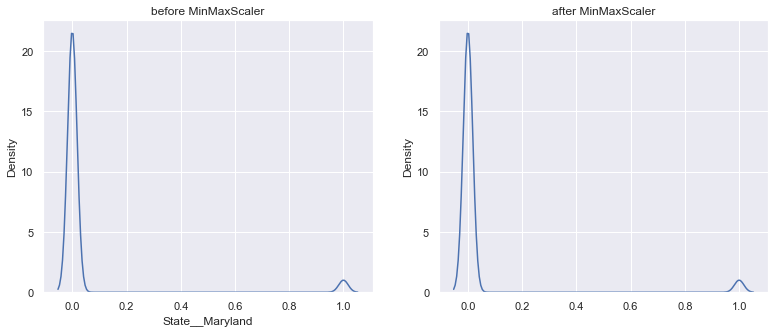

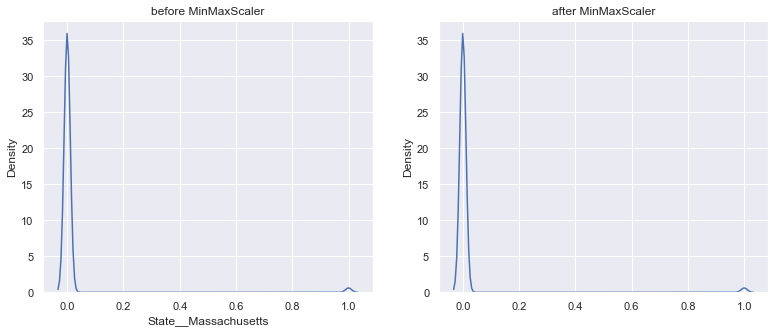

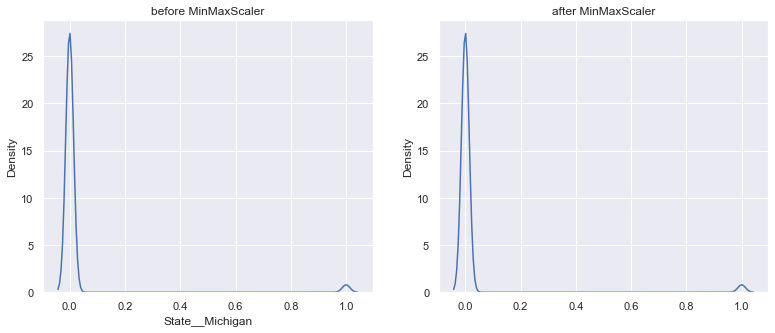

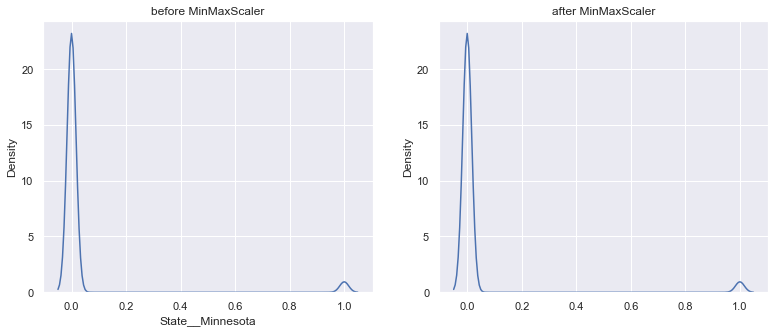

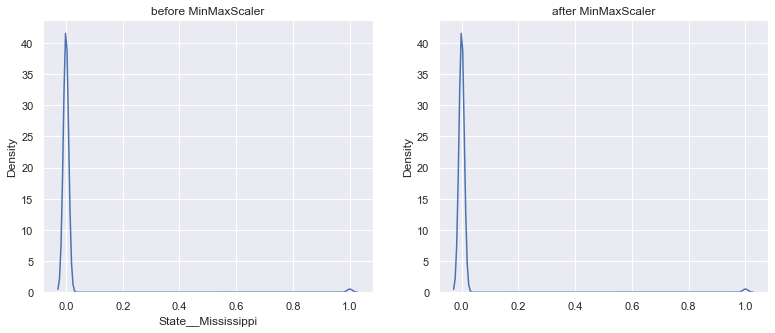

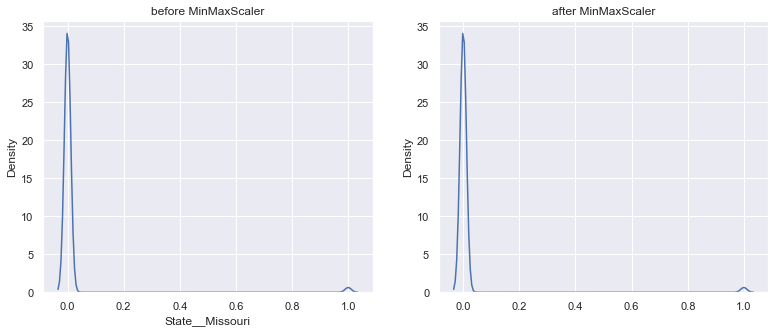

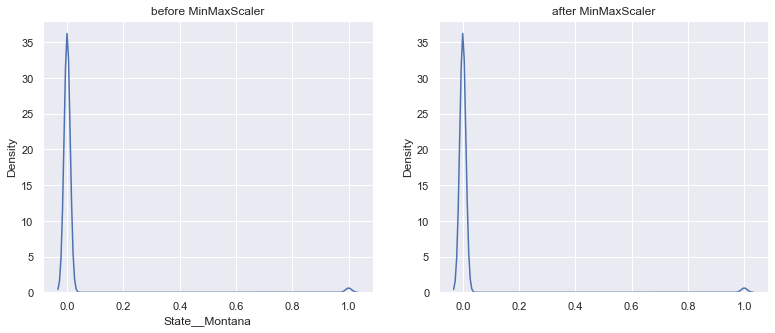

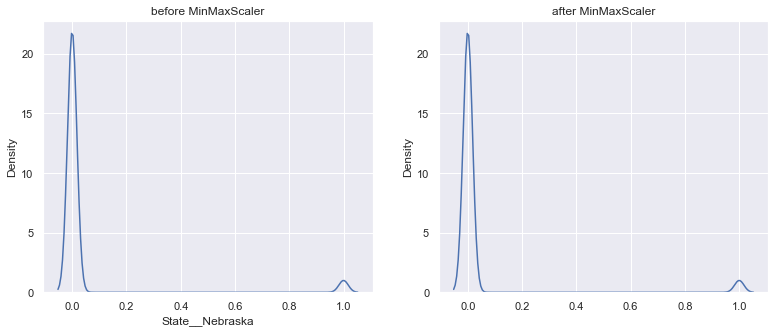

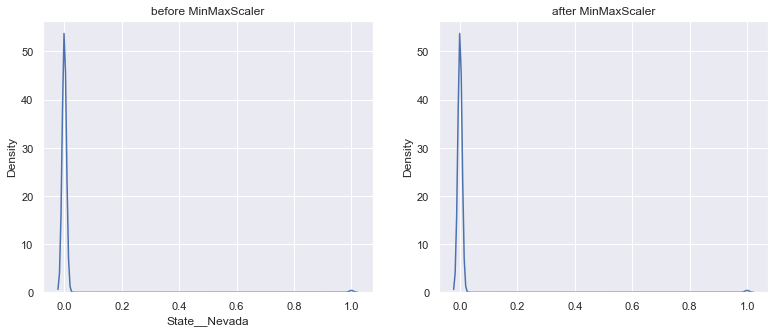

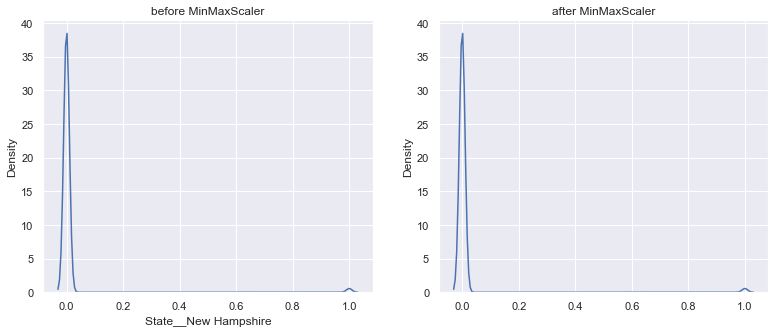

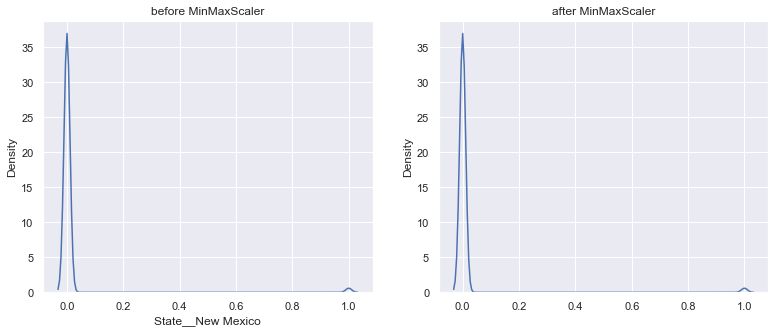

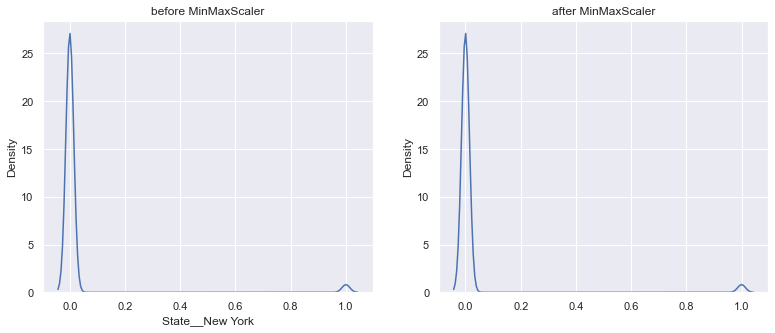

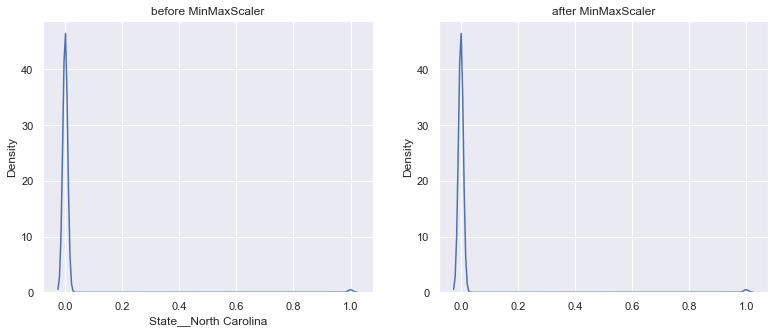

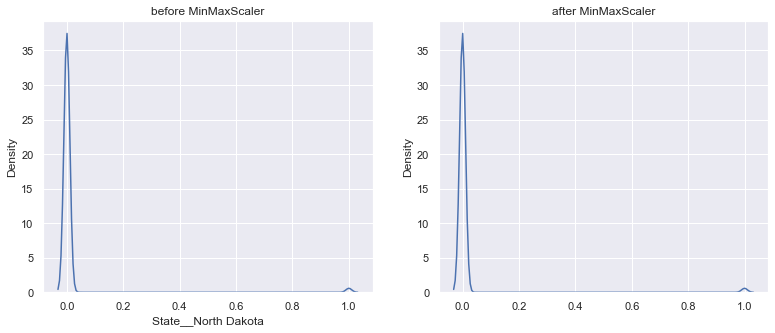

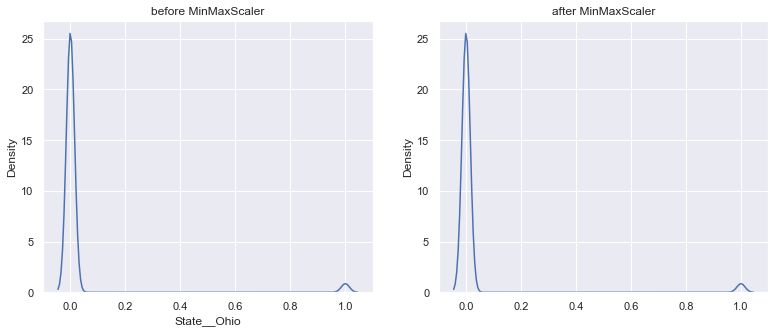

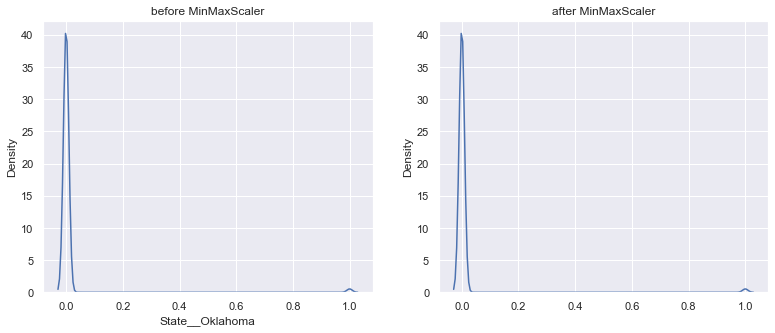

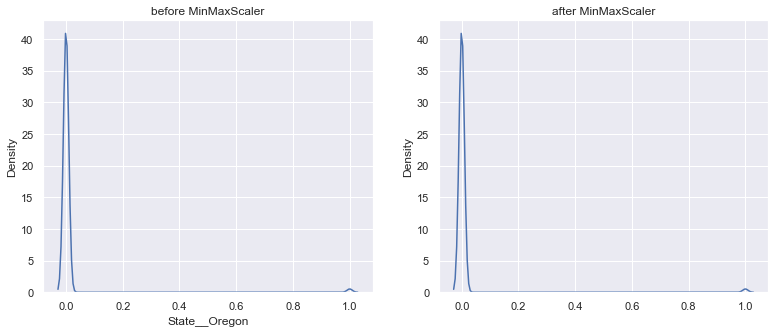

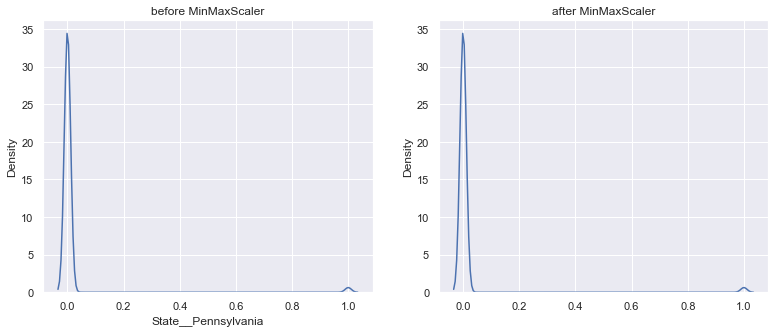

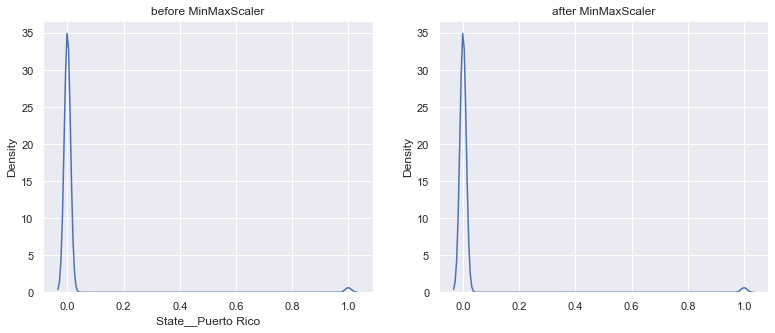

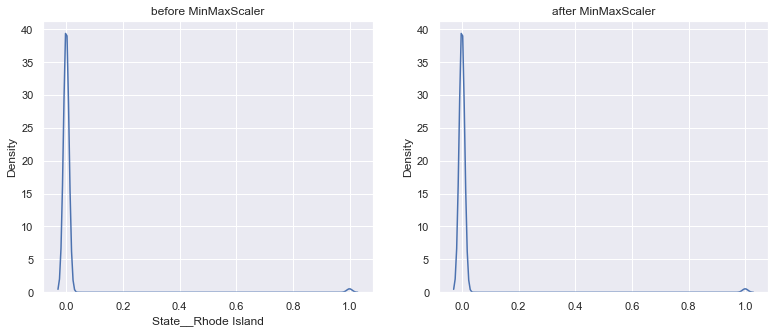

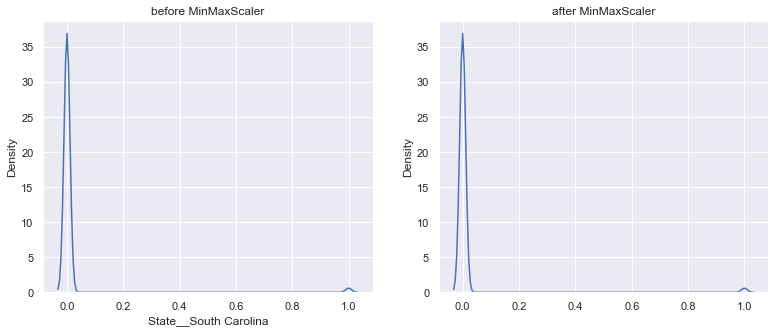

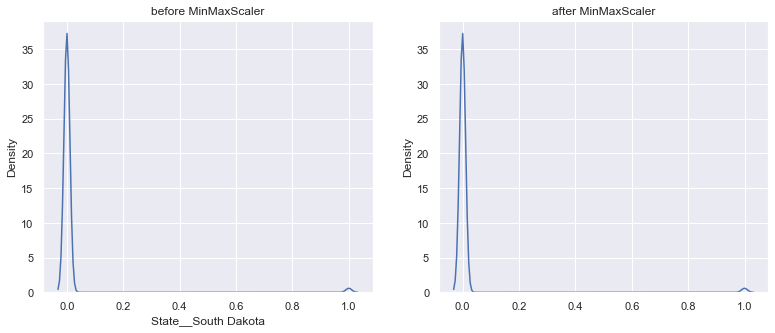

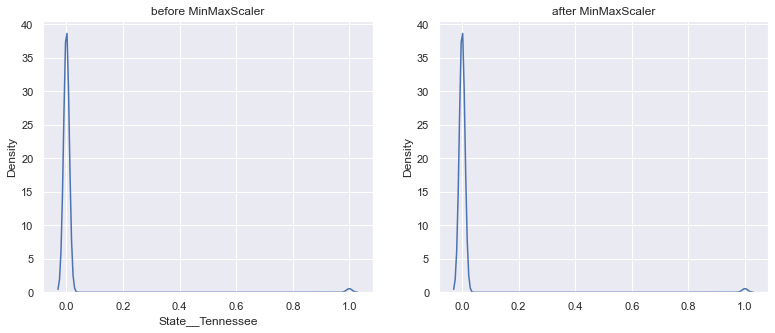

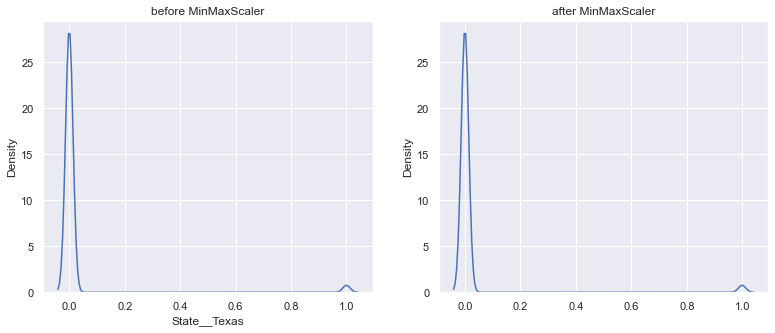

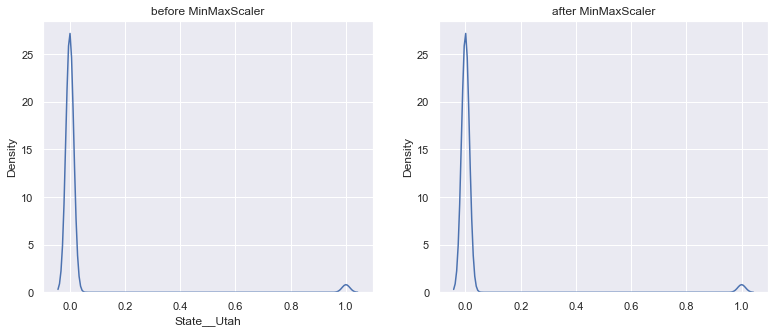

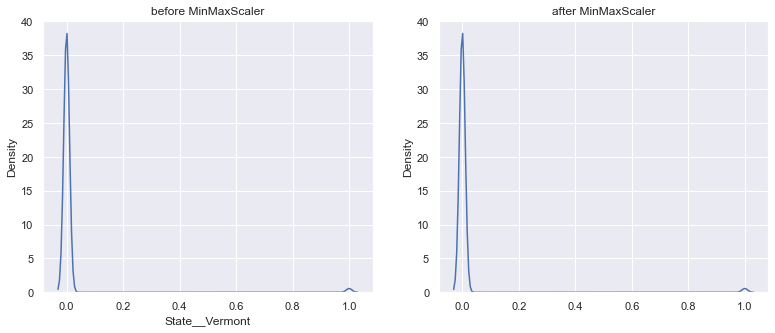

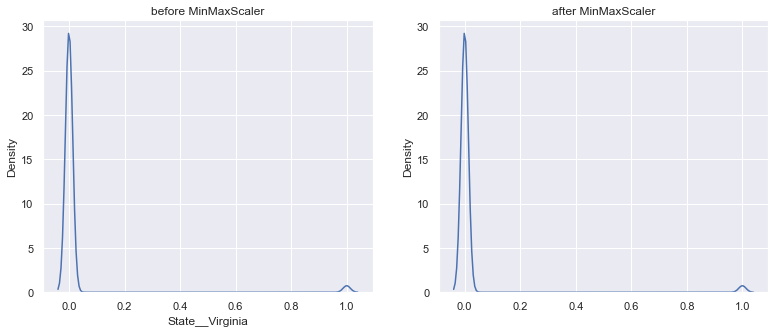

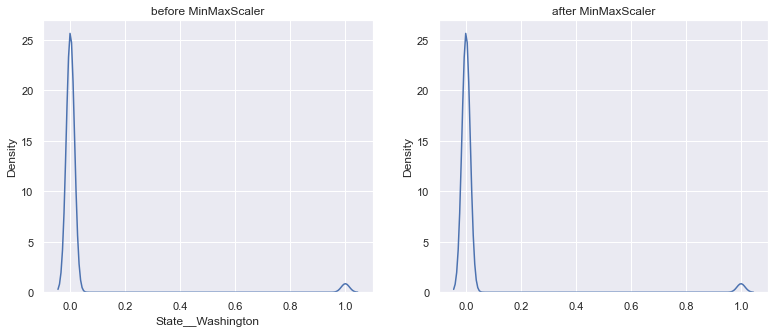

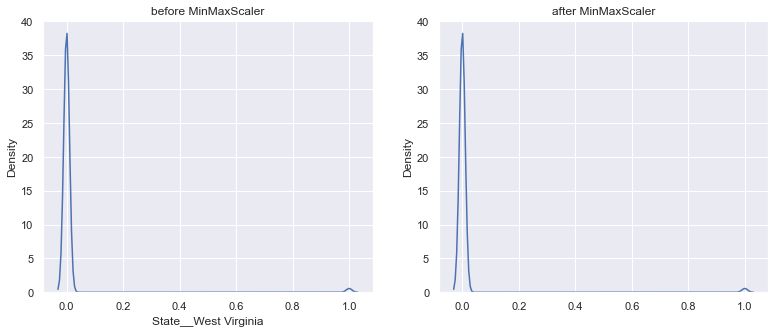

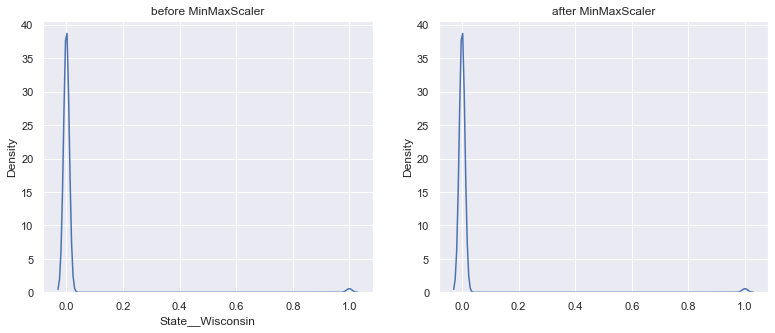

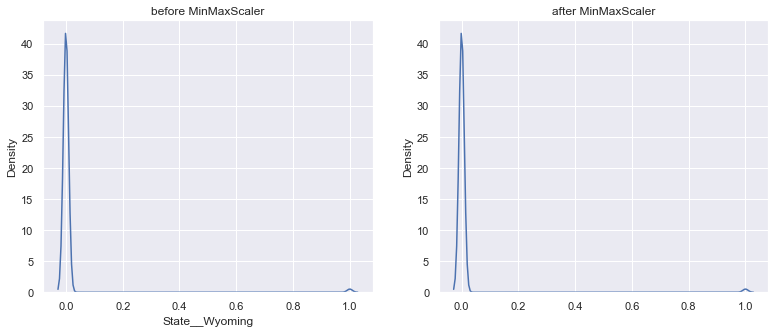

In [15]:
#checking data post scaling
for col in df.columns:
    plots(df,col, MinMaxScaler())
    
# Distribution is kept but range is standardised between 0-1.

In [16]:
df = pd.DataFrame(scaled, columns = df.columns)
# Setting default df variable to the scaled version

In [17]:
df.describe()
#check

RFHYPE5        RFCHOL2          MICHD       CVDSTRK3  \
count  219088.000000  219088.000000  219088.000000  219088.000000   
mean        0.422342       0.386877       0.089494       0.041458   
std         0.493934       0.487036       0.285456       0.199348   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       1.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

             CASTHM1       CHCSCNCR       CHCOCNCR       CHCCOPD2  \
count  219088.000000  219088.000000  219088.000000  219088.000000   
mean        0.093410       0.107569       0.105076       0.080187   
std         0.291007       0.309836       0.306653       0.271583   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

            CHCKDNY2       DIABETE4  ...  State__South Dakota  \
count  219088.000000  219088.000000  ...        219088.000000   
mean        0.039140       0.143038  ...             0.015387   
std         0.193927       0.350113  ...             0.123085   
min         0.000000       0.000000  ...             0.000000   
25%         0.000000       0.000000  ...             0.000000   
50%         0.000000       0.000000  ...             0.000000   
75%         0.000000       0.000000  ...             0.000000   
max         1.000000       1.000000  ...             1.000000   

       State__Tennessee   State__Texas    State__Utah  State__Vermont  \
count     219088.000000  219088.000000  219088.000000   219088.000000   
mean           0.013807       0.025857       0.028619        0.014401   
std            0.116690       0.158710       0.166733        0.119136   
min            0.000000       0.000000       0.000000        0.000000   
25%            0.000000       0.000000       0.000000        0.000000   
50%            0.000000       0.000000       0.000000        0.000000   
75%            0.000000       0.000000       0.000000        0.000000   
max            1.000000       1.000000       1.000000        1.000000   

       State__Virginia  State__Washington  State__West Virginia  \
count    219088.000000      219088.000000         219088.000000   
mean          0.024515           0.031878              0.014401   
std           0.154643           0.175675              0.119136   
min           0.000000           0.000000              0.000000   
25%           0.000000           0.000000              0.000000   
50%           0.000000           0.000000              0.000000   
75%           0.000000           0.000000              0.000000   
max           1.000000           1.000000              1.000000   

       State__Wisconsin  State__Wyoming  
count     219088.000000   219088.000000  
mean           0.013689        0.012096  
std            0.116195        0.109313  
min            0.000000        0.000000  
25%            0.000000        0.000000  
50%            0.000000        0.000000  
75%            0.000000        0.000000  
max            1.000000        1.000000  

[8 rows x 96 columns]

In [18]:
# set X for independent vars while y is the collection of dependent vars
X = df[x_col]
y = df[target_d]

# SMOTE 

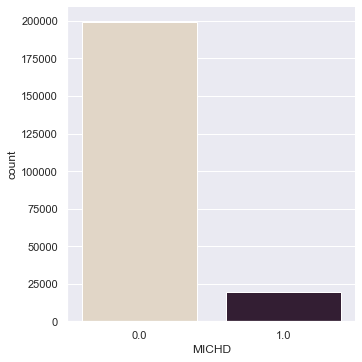

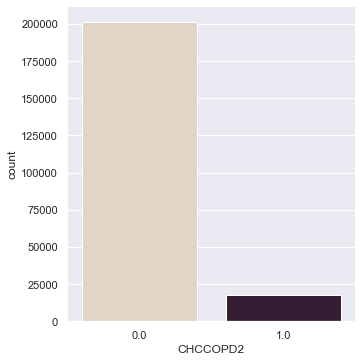

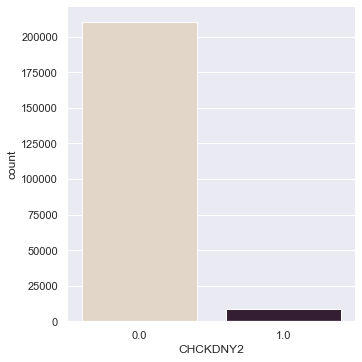

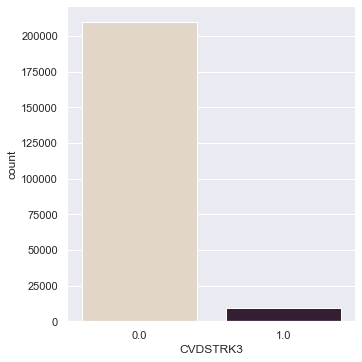

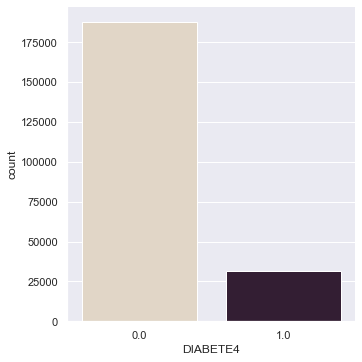

In [19]:
for x in range(len(target_d)):
    sns.catplot(x= df[target_d[x]], kind="count", palette="ch:.25", data=df)
#from simple countplots, we can see that there are imbalances in the target variables.

In [20]:
# exact extent of imbalance
for i in range(len(target_d)):
    print(round(df[f'{target_d[i]}'].value_counts() / len(df), 2)) 
# very imbalanced, mostly in the 90/10 range.

0.0    0.91
1.0    0.09
Name: MICHD, dtype: float64
0.0    0.92
1.0    0.08
Name: CHCCOPD2, dtype: float64
0.0    0.96
1.0    0.04
Name: CHCKDNY2, dtype: float64
0.0    0.96
1.0    0.04
Name: CVDSTRK3, dtype: float64
0.0    0.86
1.0    0.14
Name: DIABETE4, dtype: float64


In [21]:
from sklearn.model_selection import train_test_split
# creating a set of un-smoted test data for later testing

X0_train, X0_test, y0_train, y0_test = \
train_test_split(X,df[target_d[0]],test_size=0.3,random_state=42)

X1_train, X1_test, y1_train, y1_test = \
train_test_split(X,df[target_d[1]],test_size=0.3,random_state=42)

X2_train, X2_test, y2_train, y2_test = \
train_test_split(X,df[target_d[2]],test_size=0.3,random_state=42)

X3_train, X3_test, y3_train, y3_test = \
train_test_split(X,df[target_d[3]],test_size=0.3,random_state=42)

X4_train, X4_test, y4_train, y4_test = \
train_test_split(X,df[target_d[4]],test_size=0.3,random_state=42)

In [27]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
# Assumption = 1 Person can only have 1 disease!

In [29]:
X0_os, y0_os = oversample.fit_resample(X0_train, y0_train)
# not smote-ing test set to prevent overfitting issue 
# Model that was trained on SMOTE-ed data will perform too well if it tests on SMOTE-ed data 
# i.e only being tested on what you studied on.

In [30]:
# print(round(X1[f'{target_d[1]}'].value_counts() / len(X1), 2))
from collections import Counter
print("MICHD")
print("Before SMOTE :", Counter(y0_train))
print("After SMOTE :", Counter(y0_os))

MICHD
Before SMOTE : Counter({0.0: 139593, 1.0: 13768})
After SMOTE : Counter({0.0: 139593, 1.0: 139593})


In [31]:
X1_os, y1_os = oversample.fit_resample(X1_train, y1_train)
X2_os, y2_os = oversample.fit_resample(X2_train, y2_train)
X3_os, y3_os = oversample.fit_resample(X3_train, y3_train)
X4_os, y4_os = oversample.fit_resample(X4_train, y4_train)
# SMOTE all

print("MICHD")
print("Before SMOTE :", Counter(y0_train))
print("After SMOTE :", Counter(y0_os))
print("CHCCOPD2")
print("Before SMOTE :", Counter(y1_train))
print("After SMOTE :", Counter(y1_os))
print("CHCKDNY2")
print("Before SMOTE :", Counter(y2_train))
print("After SMOTE :", Counter(y2_os))
print("CVDSTRK3")
print("Before SMOTE :", Counter(y3_train))
print("After SMOTE :", Counter(y3_os))
print("DIABETE4")
print("Before SMOTE :", Counter(y4_train))
print("After SMOTE :", Counter(y4_os))

In [33]:
# future for-loops
x_train_list_os = ["X0_os","X1_os","X2_os","X3_os","X4_os"]
x_test_list = ["X0_test","X1_test","X2_test","X3_test","X4_test"]
y_train_list_os = ["y0_os","y1_os","y2_os","y3_os","y4_os"]
y_test_list = ["y0_test","y1_test","y2_test","y3_test","y4_test"]

## Start of NN

In [34]:
# Source: https://www.youtube.com/watch?v=aBIGJeHRZLQ
print(X0_os.shape)
print(y0_os.shape)
print(X0_test.shape)
print(y0_test.shape)
# for input shape
#     keras.layers.Dense(5, activation='softmax')])
# explore dropout layer/batch normalization
#final layer = 2 because for each NN we are making, its for 1 disease thus its either Yes/No.

(279186, 85)
(279186,)
(65727, 85)
(65727,)


In [35]:
model0 = keras.Sequential([
    keras.layers.Dense(21, input_shape=(85,), activation='relu'),
    keras.layers.Dense(21, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])


model0.compile(optimizer='adam', 
	          loss=keras.losses.BinaryCrossentropy(from_logits=True),
	          metrics=[tf.keras.metrics.Recall(thresholds = 0.3)]) 

In [36]:
model0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 21)                1806      
_________________________________________________________________
dense_1 (Dense)              (None, 21)                462       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 22        
Total params: 2,290
Trainable params: 2,290
Non-trainable params: 0
_________________________________________________________________


# Fit for MICHD

In [131]:
# https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/
m0 = model0.fit(X0_os.values, y0_os.values, batch_size=32, epochs=10)

Epoch 1/10
8725/8725 [==============================] - 9s 1ms/step - loss: 0.3781 - recall: 0.9365
Epoch 2/10
8725/8725 [==============================] - 9s 999us/step - loss: 0.3734 - recall: 0.9364
Epoch 3/10
8725/8725 [==============================] - 9s 996us/step - loss: 0.3698 - recall: 0.9360
Epoch 4/10
8725/8725 [==============================] - 9s 1ms/step - loss: 0.3660 - recall: 0.9354
Epoch 5/10
8725/8725 [==============================] - 9s 1ms/step - loss: 0.3624 - recall: 0.9359
Epoch 6/10
8725/8725 [==============================] - 9s 1ms/step - loss: 0.3595 - recall: 0.9357
Epoch 7/10
8725/8725 [==============================] - 9s 1ms/step - loss: 0.3573 - recall: 0.9350
Epoch 8/10
8725/8725 [==============================] - 9s 1ms/step - loss: 0.3557 - recall: 0.9352
Epoch 9/10
8725/8725 [==============================] - 9s 1ms/step - loss: 0.3540 - recall: 0.9349
Epoch 10/10
8725/8725 [==============================] - 9s 1ms/step - loss: 0.3529 - recall: 0.

In [132]:
print("EVALUATION")
model0.evaluate(X0_test.values, y0_test.values)

EVALUATION
2054/2054 [==============================] - 2s 758us/step - loss: 0.4577 - recall: 0.7770


[0.4577329158782959, 0.7770166397094727]

In [133]:
y0_pred = model0.predict_classes(X0_test.values)
print("Prediction", y0_pred)
# np.array(X0_os.iloc[0])

Prediction [[0]
 [0]
 [1]
 ...
 [0]
 [1]
 [1]]


In [134]:
unique_elements, counts_elements = np.unique(y0_pred, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [49256 16471]]


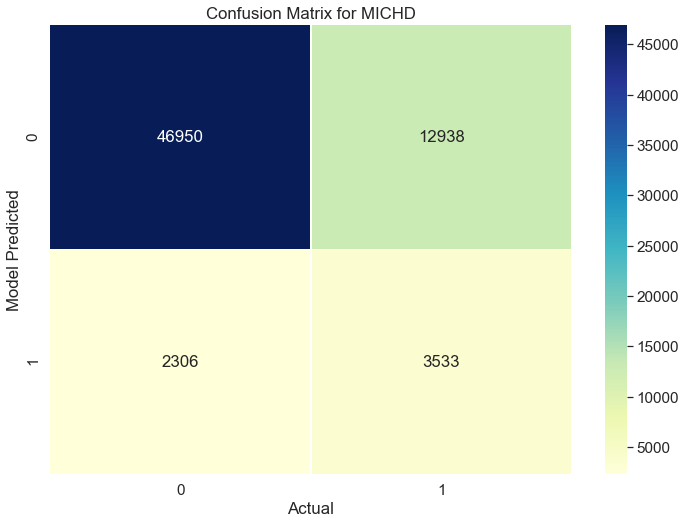

In [135]:
from sklearn.metrics import confusion_matrix, classification_report

cm0 = confusion_matrix(y0_test, y0_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm0, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
ax = plt.axes() 
ax.set(xlabel='Actual', ylabel='Model Predicted')
ax.set_title('Confusion Matrix for MICHD')
plt.show()

In [136]:
print(f"Classification Report for {target_d[0]}")
print(classification_report(y0_test, y0_pred))

Classification Report for MICHD
              precision    recall  f1-score   support

         0.0       0.95      0.78      0.86     59888
         1.0       0.21      0.61      0.32      5839

    accuracy                           0.77     65727
   macro avg       0.58      0.69      0.59     65727
weighted avg       0.89      0.77      0.81     65727



# Fit for CHCCOPD2

In [137]:
model1 = keras.Sequential([
    keras.layers.Dense(21, input_shape=(85,), activation='relu'),
    keras.layers.Dense(21, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])


model1.compile(optimizer='adam', 
	          loss=keras.losses.BinaryCrossentropy(from_logits=True),
	          metrics=[tf.keras.metrics.Recall(thresholds = 0.3)]) 

In [138]:
m1 = model1.fit(X1_os.values, y1_os.values, batch_size=32, epochs=10)

Epoch 1/10
8817/8817 [==============================] - 10s 1ms/step - loss: 0.4912 - recall_8: 0.9187
Epoch 2/10
8817/8817 [==============================] - 9s 1ms/step - loss: 0.4490 - recall_8: 0.9198
Epoch 3/10
8817/8817 [==============================] - 9s 1ms/step - loss: 0.4317 - recall_8: 0.9239
Epoch 4/10
8817/8817 [==============================] - 9s 1ms/step - loss: 0.4220 - recall_8: 0.9267
Epoch 5/10
8817/8817 [==============================] - 9s 1ms/step - loss: 0.4148 - recall_8: 0.9274
Epoch 6/10
8817/8817 [==============================] - 9s 1ms/step - loss: 0.4052 - recall_8: 0.9292
Epoch 7/10
8817/8817 [==============================] - 9s 1ms/step - loss: 0.4014 - recall_8: 0.9298
Epoch 8/10
8817/8817 [==============================] - 9s 1ms/step - loss: 0.3967 - recall_8: 0.9299
Epoch 9/10
8817/8817 [==============================] - 9s 1ms/step - loss: 0.3914 - recall_8: 0.9309
Epoch 10/10
8817/8817 [==============================] - 9s 1ms/step - loss: 0.38

In [139]:
print("EVALUATION")
model1.evaluate(X1_test.values, y1_test.values)

EVALUATION
2054/2054 [==============================] - 2s 775us/step - loss: 0.4222 - recall_8: 0.7604


[0.4221777319908142, 0.7604483366012573]

In [140]:
y1_pred = model1.predict_classes(X1_test.values)
print("Prediction", y1_pred)

Prediction [[0]
 [0]
 [1]
 ...
 [0]
 [1]
 [0]]


In [141]:
unique_elements, counts_elements = np.unique(y1_pred, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [51283 14444]]


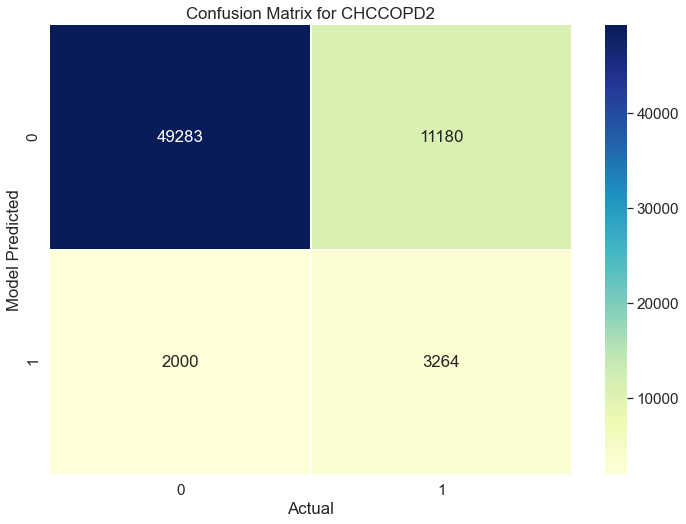

In [142]:
cm1 = confusion_matrix(y1_test, y1_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm1, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
ax = plt.axes()
ax.set(xlabel='Actual', ylabel='Model Predicted')
ax.set_title('Confusion Matrix for CHCCOPD2')
plt.show()

In [143]:
print(f"Classification Report for {target_d[1]}")
print(classification_report(y1_test, y1_pred))

Classification Report for CHCCOPD2
              precision    recall  f1-score   support

         0.0       0.96      0.82      0.88     60463
         1.0       0.23      0.62      0.33      5264

    accuracy                           0.80     65727
   macro avg       0.59      0.72      0.61     65727
weighted avg       0.90      0.80      0.84     65727



# Fit for CHCKDNY2

In [144]:
model2 = keras.Sequential([
    keras.layers.Dense(21, input_shape=(85,), activation='relu'),
    keras.layers.Dense(21, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])


model2.compile(optimizer='adam', 
	          loss=keras.losses.BinaryCrossentropy(from_logits=True),
	          metrics=[tf.keras.metrics.Recall(thresholds = 0.3)]) 

In [145]:
m2 = model2.fit(X2_os.values, y2_os.values, batch_size=32, epochs=10)

Epoch 1/10
9214/9214 [==============================] - 10s 1ms/step - loss: 0.5188 - recall_9: 0.9253
Epoch 2/10
9214/9214 [==============================] - 10s 1ms/step - loss: 0.4529 - recall_9: 0.9325
Epoch 3/10
9214/9214 [==============================] - 10s 1ms/step - loss: 0.4298 - recall_9: 0.9363
Epoch 4/10
9214/9214 [==============================] - 10s 1ms/step - loss: 0.4153 - recall_9: 0.9385
Epoch 5/10
9214/9214 [==============================] - 10s 1ms/step - loss: 0.4081 - recall_9: 0.9409
Epoch 6/10
9214/9214 [==============================] - 10s 1ms/step - loss: 0.3985 - recall_9: 0.9426
Epoch 7/10
9214/9214 [==============================] - 10s 1ms/step - loss: 0.3928 - recall_9: 0.9418
Epoch 8/10
9214/9214 [==============================] - 10s 1ms/step - loss: 0.3885 - recall_9: 0.9432
Epoch 9/10
9214/9214 [==============================] - 10s 1ms/step - loss: 0.3842 - recall_9: 0.9448
Epoch 10/10
9214/9214 [==============================] - 10s 1ms/step - l

In [146]:
print("EVALUATION")
model2.evaluate(X2_test.values, y2_test.values)

EVALUATION
2054/2054 [==============================] - 2s 742us/step - loss: 0.4984 - recall_9: 0.6927


[0.4983977675437927, 0.6927182674407959]

In [147]:
y2_pred = model2.predict_classes(X2_test.values)
print("Prediction", y2_pred)
# np.array(X0_os.iloc[0])

Prediction [[0]
 [0]
 [1]
 ...
 [0]
 [1]
 [1]]


In [148]:
unique_elements, counts_elements = np.unique(y2_pred, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [49134 16593]]


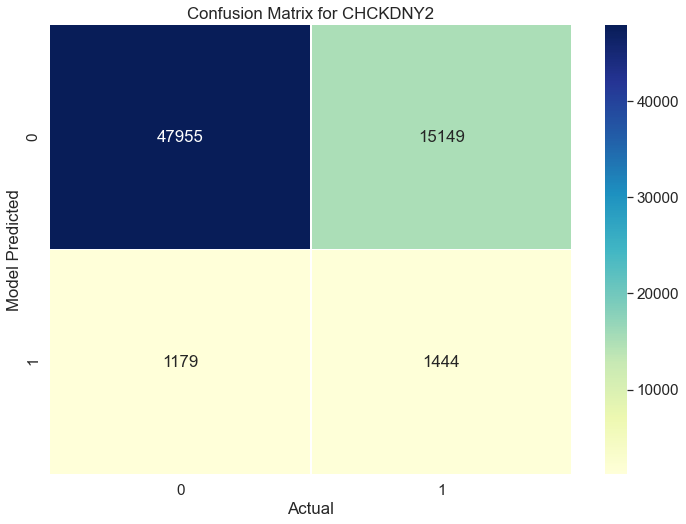

In [149]:
cm2 = confusion_matrix(y2_test, y2_pred)

sns.set(font_scale=1.4)
sns.heatmap(cm2, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
ax = plt.axes()
ax.set(xlabel='Actual', ylabel='Model Predicted')
ax.set_title('Confusion Matrix for CHCKDNY2')
plt.show()

In [150]:
print(f"Classification Report for {target_d[2]}")
print(classification_report(y2_test, y2_pred))

Classification Report for CHCKDNY2
              precision    recall  f1-score   support

         0.0       0.98      0.76      0.85     63104
         1.0       0.09      0.55      0.15      2623

    accuracy                           0.75     65727
   macro avg       0.53      0.66      0.50     65727
weighted avg       0.94      0.75      0.83     65727



# Fit for CVDSTRK3

In [151]:
model3 = keras.Sequential([
    keras.layers.Dense(21, input_shape=(85,), activation='relu'),
    keras.layers.Dense(21, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])


model3.compile(optimizer='adam', 
	          loss=keras.losses.BinaryCrossentropy(from_logits=True),
	          metrics=[tf.keras.metrics.Recall(thresholds = 0.3)]) 

In [152]:
m3 = model3.fit(X3_os.values, y3_os.values, batch_size=32, epochs=10)

Epoch 1/10
9189/9189 [==============================] - 11s 1ms/step - loss: 0.5079 - recall_10: 0.9320
Epoch 2/10
9189/9189 [==============================] - 10s 1ms/step - loss: 0.4435 - recall_10: 0.9362
Epoch 3/10
9189/9189 [==============================] - 10s 1ms/step - loss: 0.4238 - recall_10: 0.9399
Epoch 4/10
9189/9189 [==============================] - 10s 1ms/step - loss: 0.4086 - recall_10: 0.9416
Epoch 5/10
9189/9189 [==============================] - 10s 1ms/step - loss: 0.4016 - recall_10: 0.9432
Epoch 6/10
9189/9189 [==============================] - 10s 1ms/step - loss: 0.3949 - recall_10: 0.9434
Epoch 7/10
9189/9189 [==============================] - 10s 1ms/step - loss: 0.3864 - recall_10: 0.9446
Epoch 8/10
9189/9189 [==============================] - 9s 948us/step - loss: 0.3829 - recall_10: 0.9450
Epoch 9/10
9189/9189 [==============================] - 9s 954us/step - loss: 0.3787 - recall_10: 0.9473
Epoch 10/10
9189/9189 [==============================] - 9s 94

In [153]:
print("EVALUATION")
model3.evaluate(X3_test.values, y3_test.values)

EVALUATION
2054/2054 [==============================] - 2s 751us/step - loss: 0.4161 - recall_10: 0.6584


[0.41610488295555115, 0.658403217792511]

In [154]:
y3_pred = model3.predict_classes(X3_test.values)
print("Prediction", y3_pred)
# np.array(X0_os.iloc[0])

Prediction [[0]
 [0]
 [1]
 ...
 [0]
 [1]
 [0]]


In [155]:
unique_elements, counts_elements = np.unique(y3_pred, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [52344 13383]]


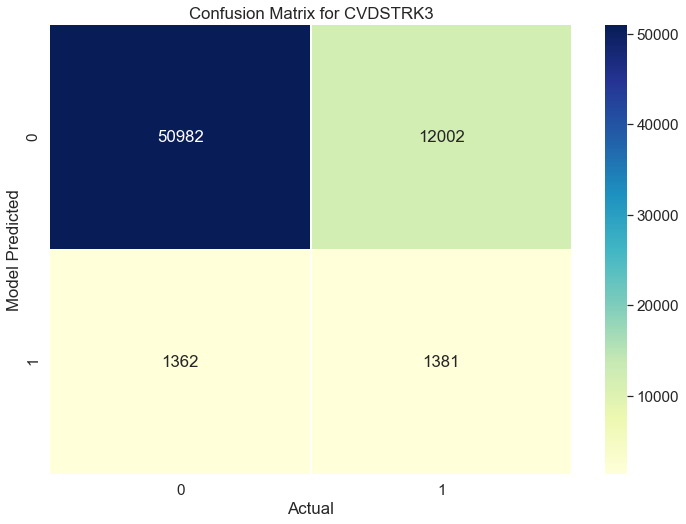

In [156]:
cm3 = confusion_matrix(y3_test, y3_pred)

sns.set(font_scale=1.4)
sns.heatmap(cm3, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
ax = plt.axes()
ax.set(xlabel='Actual', ylabel='Model Predicted')
ax.set_title('Confusion Matrix for CVDSTRK3')
plt.show()

In [157]:
print(f"Classification Report for {target_d[3]}")
print(classification_report(y3_test, y3_pred))

Classification Report for CVDSTRK3
              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88     62984
         1.0       0.10      0.50      0.17      2743

    accuracy                           0.80     65727
   macro avg       0.54      0.66      0.53     65727
weighted avg       0.94      0.80      0.85     65727



# Fit for DIABETE4

In [158]:
model4 = keras.Sequential([
    keras.layers.Dense(21, input_shape=(85,), activation='relu'),
    keras.layers.Dense(21, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])


model4.compile(optimizer='adam', 
	          loss=keras.losses.BinaryCrossentropy(from_logits=True),
	          metrics=[tf.keras.metrics.Recall(thresholds = 0.3)]) 

In [159]:
m4 = model4.fit(X4_os.values, y4_os.values, 
           batch_size=32, epochs=10)

Epoch 1/10
8214/8214 [==============================] - 8s 948us/step - loss: 0.5224 - recall_11: 0.9427
Epoch 2/10
8214/8214 [==============================] - 8s 957us/step - loss: 0.4729 - recall_11: 0.9365
Epoch 3/10
8214/8214 [==============================] - 8s 957us/step - loss: 0.4614 - recall_11: 0.9353
Epoch 4/10
8214/8214 [==============================] - 8s 953us/step - loss: 0.4514 - recall_11: 0.9352
Epoch 5/10
8214/8214 [==============================] - 8s 947us/step - loss: 0.4464 - recall_11: 0.9339
Epoch 6/10
8214/8214 [==============================] - 8s 948us/step - loss: 0.4413 - recall_11: 0.9341
Epoch 7/10
8214/8214 [==============================] - 8s 969us/step - loss: 0.4366 - recall_11: 0.9331
Epoch 8/10
8214/8214 [==============================] - 8s 954us/step - loss: 0.4314 - recall_11: 0.9345
Epoch 9/10
8214/8214 [==============================] - 8s 951us/step - loss: 0.4261 - recall_11: 0.9346
Epoch 10/10
8214/8214 [==============================] 

In [160]:
print("EVALUATION")
model4.evaluate(X4_test.values, y4_test.values)

EVALUATION
2054/2054 [==============================] - 2s 701us/step - loss: 0.4950 - recall_11: 0.8319


[0.494974285364151, 0.8319318890571594]

In [161]:
y4_pred = model4.predict_classes(X4_test.values)
print("Prediction", y4_pred)
# np.array(X0_os.iloc[0])

Prediction [[0]
 [0]
 [1]
 ...
 [0]
 [1]
 [1]]


In [162]:
unique_elements, counts_elements = np.unique(y4_pred, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [45154 20573]]


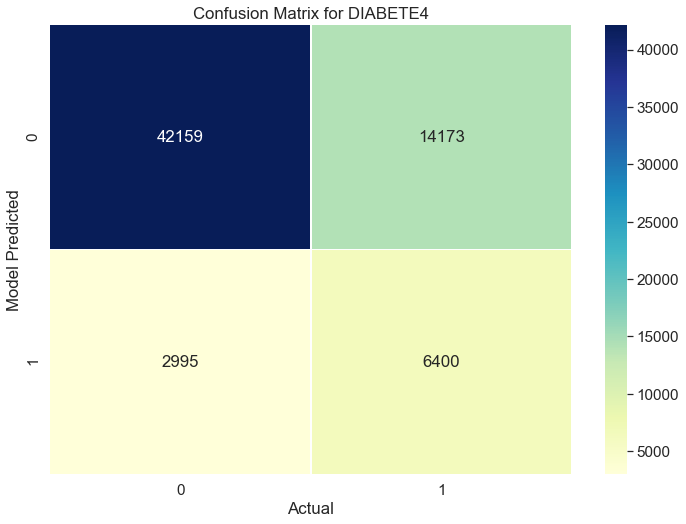

In [163]:
cm4 = confusion_matrix(y4_test, y4_pred)

sns.set(font_scale=1.4)
sns.heatmap(cm4, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
ax = plt.axes()
ax.set(xlabel='Actual', ylabel='Model Predicted')
ax.set_title('Confusion Matrix for DIABETE4')
plt.show()

In [164]:
print(f"Classification Report for {target_d[-1]}")
print(classification_report(y4_test, y4_pred))

Classification Report for DIABETE4
              precision    recall  f1-score   support

         0.0       0.93      0.75      0.83     56332
         1.0       0.31      0.68      0.43      9395

    accuracy                           0.74     65727
   macro avg       0.62      0.71      0.63     65727
weighted avg       0.84      0.74      0.77     65727



# SHAP Section

In [165]:
import shap

## MICHD Feature Importance

In [166]:
shap.initjs()
explainer0 = shap.DeepExplainer(model0, np.array(X0_os.iloc[:200]))
shap_values0 = explainer0.shap_values(np.array(X0_test))

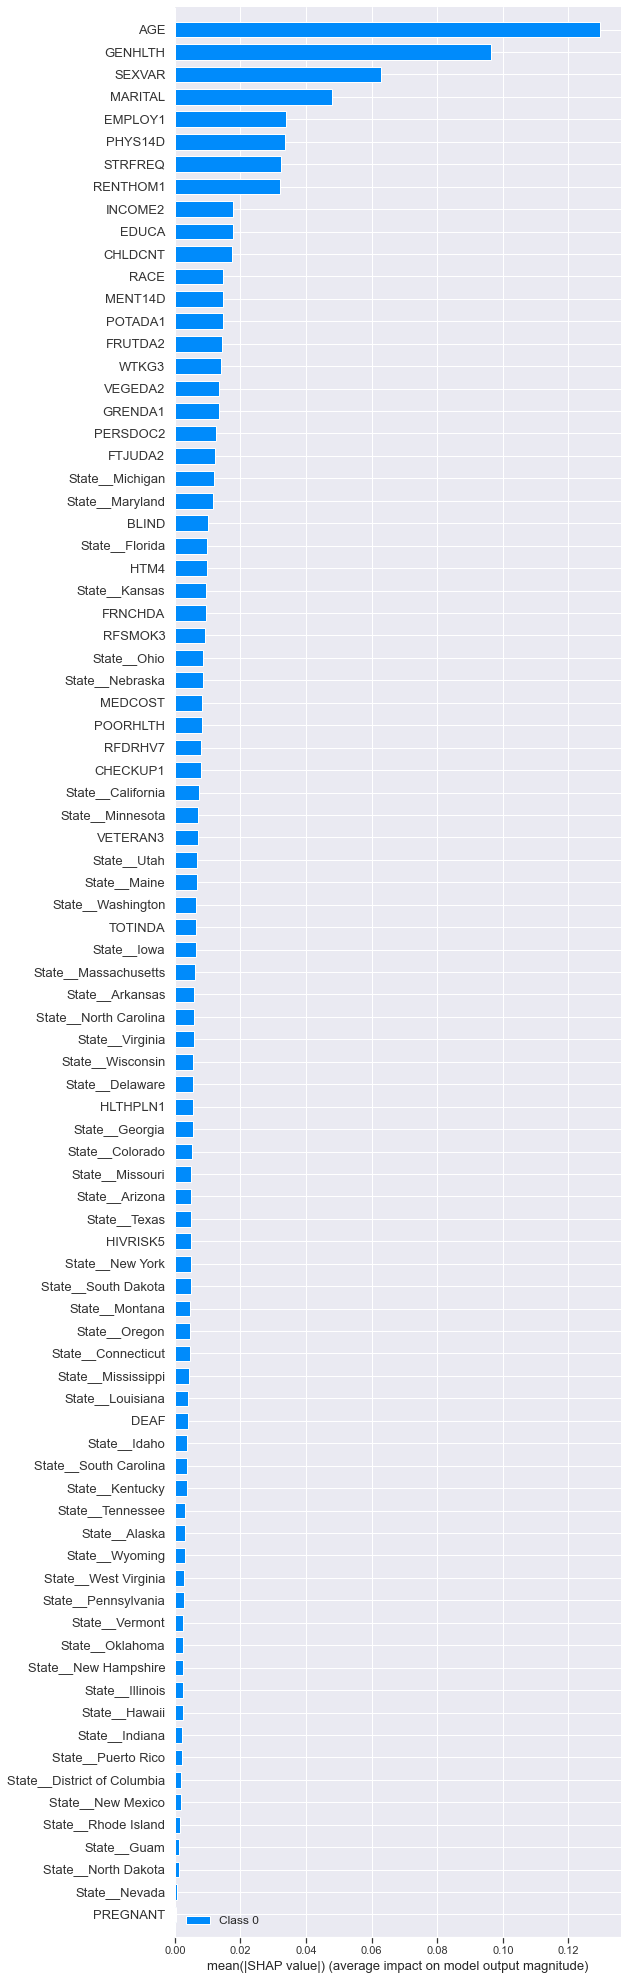

In [178]:
shap.summary_plot(shap_values0, X0_test,show=False, max_display=X.shape[1])

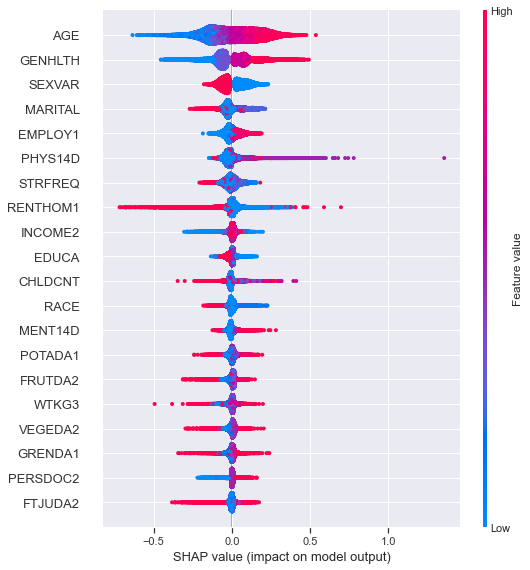

In [181]:
shap.summary_plot(shap_values0[0], X0_test)

## CHCCOPD2 Feature Importance

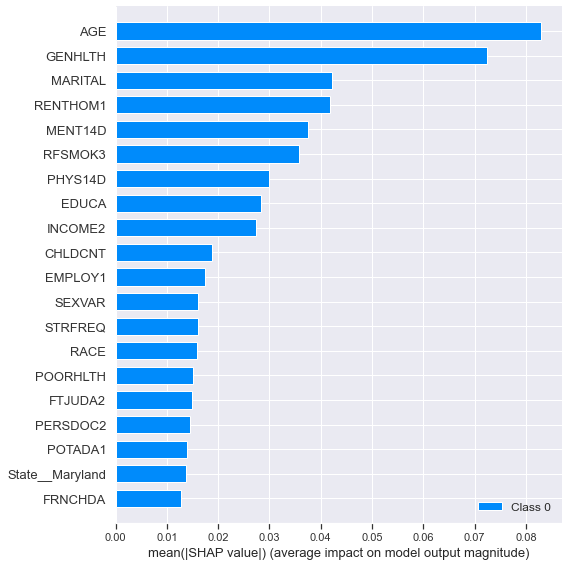

In [169]:
shap.initjs()
explainer1 = shap.DeepExplainer(model1, np.array(X1_os.iloc[:200]))
shap_values1 = explainer1.shap_values(X1_test.values)
shap.summary_plot(shap_values1, X1_test)

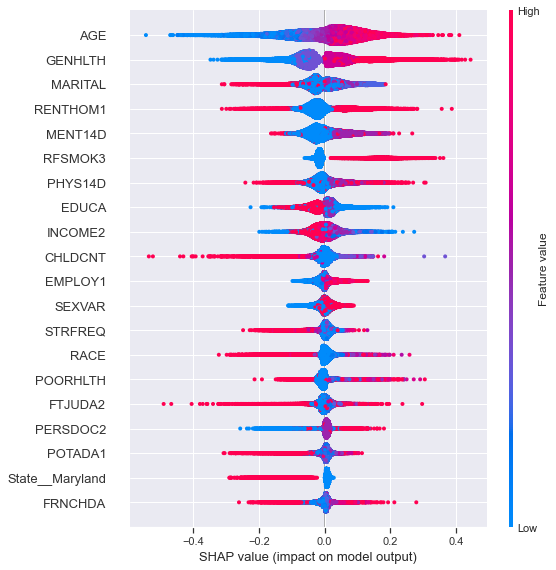

In [170]:
shap.summary_plot(shap_values1[0], X1_test)

## CHCKDNY2 Feature Importance

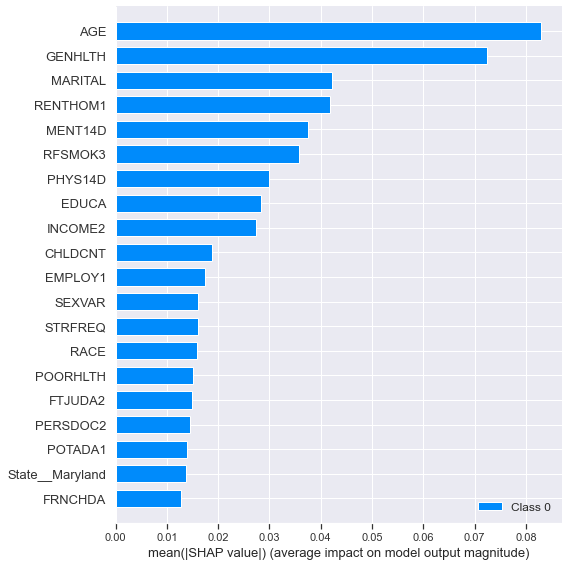

In [171]:
explainer2 = shap.DeepExplainer(model2, np.array(X2_os.iloc[:200]))
shap_values2 = explainer1.shap_values(X2_test.values)
shap.summary_plot(shap_values2, X2_test)

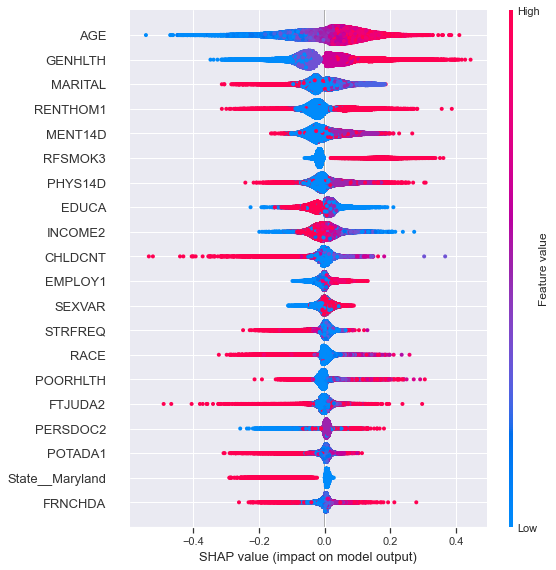

In [172]:
shap.summary_plot(shap_values2[0], X2_test)

## CVDSTRK3 Feature Importance

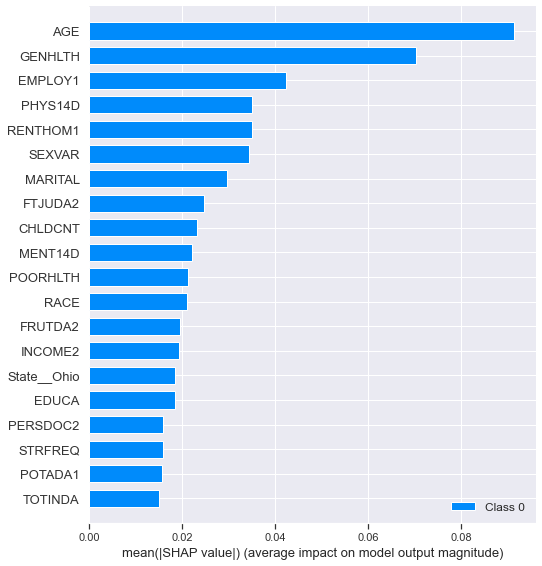

In [173]:
explainer3 = shap.DeepExplainer(model3, np.array(X3_os.iloc[:200]))
shap_values3 = explainer3.shap_values(X3_test.values)
shap.summary_plot(shap_values3, X3_test)

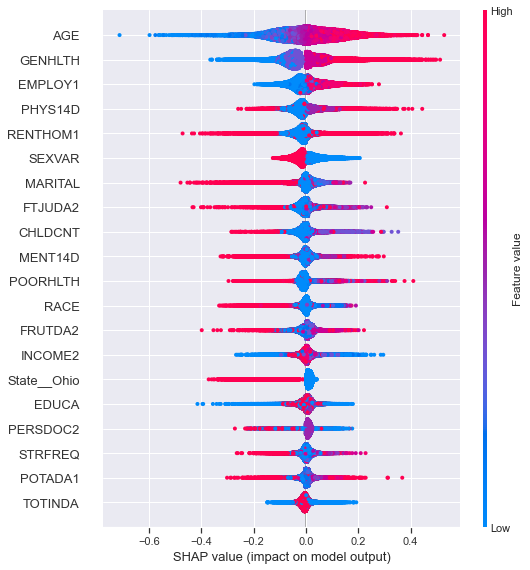

In [174]:
shap.summary_plot(shap_values3[0], X3_test)

## DIABETE4 Feature Importance

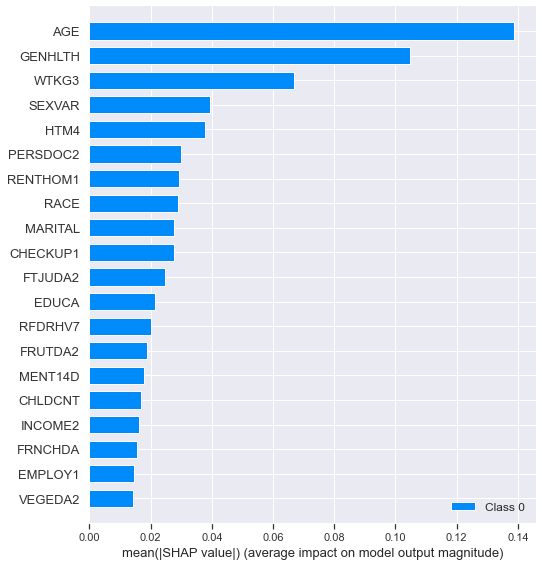

In [182]:
explainer4 = shap.DeepExplainer(model4, np.array(X4_os.iloc[:300]))
shap_values4 = explainer4.shap_values(X4_test.values)
shap.summary_plot(shap_values4, X4_test)

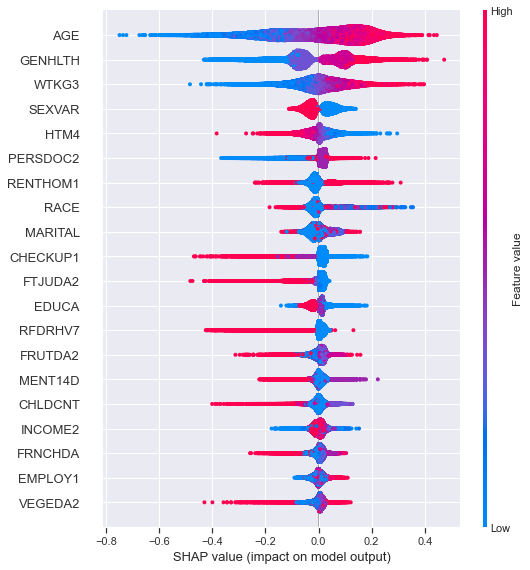

In [183]:
shap.summary_plot(shap_values4[0], X4_test)